##### Reading the train data and showing the value count in graph maner









In [ ]:
import numpy as np
import pandas as pd
import os
from re import search
import shutil
import natsort
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Dense,Activation,Flatten,Concatenate,concatenate,Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout,BatchNormalization,GlobalAveragePooling2D
from keras.utils.vis_utils import plot_model

print("Loading the dataset...")
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/Dataset_from_fundus_images_for_the_study_of_diabetic_retinopathy_V02/train.csv')
train_df.head(10)

Loading the dataset...


Image         Status
0  232.jpg  Moderate NPDR
1  202.jpg  Moderate NPDR
2  199.jpg  Moderate NPDR
3  194.jpg  Moderate NPDR
4  241.jpg  Moderate NPDR
5  238.jpg  Moderate NPDR
6  221.jpg  Moderate NPDR
7  269.jpg  Moderate NPDR
8  196.jpg  Moderate NPDR
9  210.jpg  Moderate NPDR

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(train_df['Status'].unique(), len(train_df['Status'].unique()))

['Moderate NPDR' 'PDR' 'No DR signs' 'Advanced PDR' 'Severe NPDR'
 'Mild (or early) NPDR' 'Very Severe NPDR'] 7


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


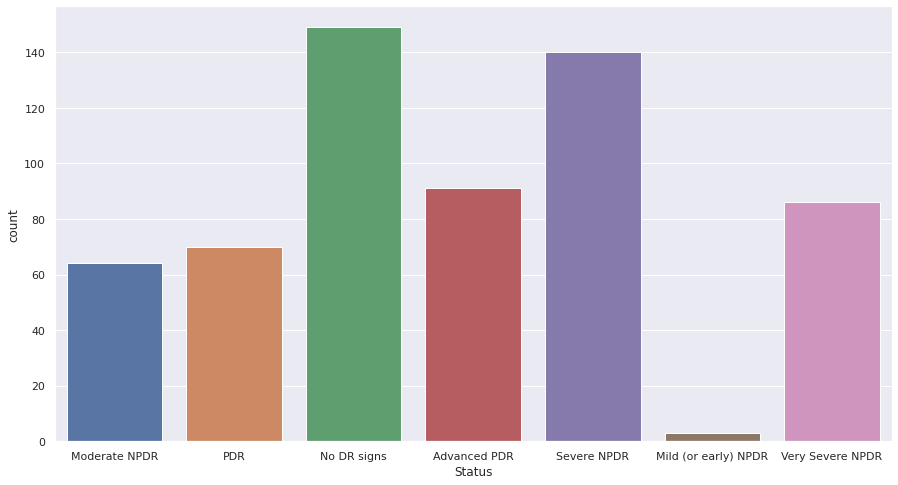

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(train_df['Status'])

In [ ]:
print("Loading test data from test.csv...")
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/Dataset_from_fundus_images_for_the_study_of_diabetic_retinopathy_V02/test.csv')
test_df.head(5)

Loading test data from test.csv...


Image
0  263.jpg
1  236.jpg
2  261.jpg
3  258.jpg
4  216.jpg

In [ ]:
"""
This function is for showing image of different stage of ratinopathy
"""
def showImage(image, title):
  plt.figure(figsize=(5,5))
  plt.grid(False)
  plt.imshow(image)
  plt.title(title)
  plt.show()

#### Shwoing image of No DR signs

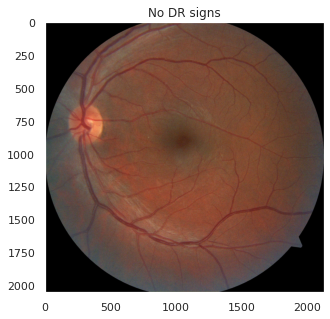

In [ ]:
image = Image.open('/content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/Dataset_from_fundus_images_for_the_study_of_diabetic_retinopathy_V02/1. No DR signs/2.jpg')
showImage(image, 'No DR signs')

#### Showing Image of Mild or Early NPDR

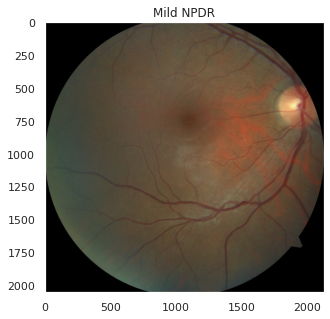

In [ ]:
image = Image.open('/content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/Dataset_from_fundus_images_for_the_study_of_diabetic_retinopathy_V02/2. Mild (or early) NPDR/188.jpg')
showImage(image, 'Mild NPDR')

#### Showing Image of Moderate NPDR

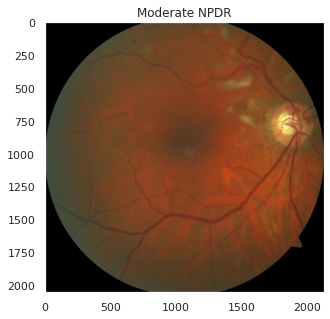

In [ ]:
image = Image.open('/content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/Dataset_from_fundus_images_for_the_study_of_diabetic_retinopathy_V02/3. Moderate NPDR/192.jpg')
showImage(image, 'Moderate NPDR')

#### Showing Image of Severe NPDR

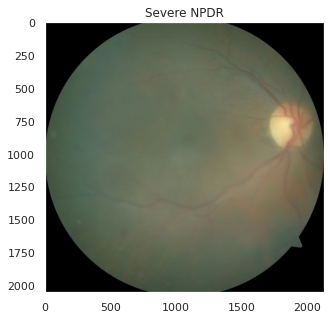

In [ ]:
image = Image.open('/content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/Dataset_from_fundus_images_for_the_study_of_diabetic_retinopathy_V02/4. Severe NPDR/272.jpg')
showImage(image, 'Severe NPDR')

#### Showing image of Very Severe NPDR

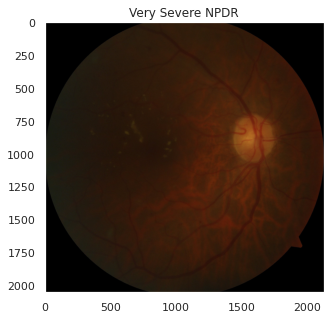

In [ ]:
image = Image.open('/content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/Dataset_from_fundus_images_for_the_study_of_diabetic_retinopathy_V02/5. Very Severe NPDR/448.jpg')
showImage(image, 'Very Severe NPDR')

#### Showing image of PDR

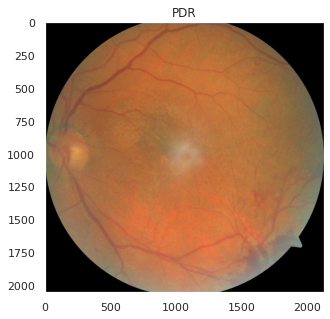

In [ ]:
image = Image.open('/content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/Dataset_from_fundus_images_for_the_study_of_diabetic_retinopathy_V02/6. PDR/556.jpg')
showImage(image, 'PDR')

#### Showing image of Advance PDR

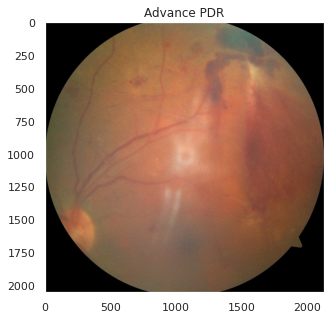

In [ ]:
image = Image.open('/content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/Dataset_from_fundus_images_for_the_study_of_diabetic_retinopathy_V02/7. Advanced PDR/644.jpg')
showImage(image, 'Advance PDR')

#### Creating seperate folder for train and test Image

In [ ]:
path_dir = '/content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image'

In [ ]:
ls = ['No DR signs', 'Mild (or early) NPDR', 'Moderate NPDR', 'Severe NPDR', 'Very Severe NPDR', 'PDR', 'Advanced PDR']

In [ ]:
shutil.os.mkdir(path_dir + '/train')
for dir_name in ls:
  shutil.os.mkdir(path_dir + '/train/' + dir_name)

shutil.os.mkdir(path_dir + '/test')

#### Function for copying image to its folder

In [ ]:
def copy_image_to_test(df):
  path_dir = '/content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/Dataset_from_fundus_images_for_the_study_of_diabetic_retinopathy_V02'
  test_dir = '/content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/test'
  for data in tqdm(df):
    for dir in os.listdir(path_dir):
      if os.path.isdir(path_dir +'/{}'.format(dir)):
        dir_ls = os.listdir(path_dir+ '/{}'.format(dir))
        if data in dir_ls:
          shutil.copy(path_dir+'/{}/{}'.format(dir,data), test_dir)
  
  return 
  

In [ ]:
copy_image_to_test(test_df['Image'])

100%|██████████| 154/154 [00:05<00:00, 25.81it/s]


#### Function for copying image to train

In [ ]:
def copy_image_to_train():
  path_dir = '/content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/Dataset_from_fundus_images_for_the_study_of_diabetic_retinopathy_V02'
  train_dir = '/content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/train'
  for data in tqdm(train_df['Image']):
    for dir in os.listdir(path_dir):
      if os.path.isdir(path_dir +'/{}'.format(dir)):
        dir_ls = os.listdir(path_dir+ '/{}'.format(dir))
        if data in dir_ls:
          shutil.copy(path_dir+'/{}/{}'.format(dir,data), train_dir+'/{}'.format(dir.split('.')[1].strip()))
  
  return


In [ ]:
copy_image_to_train()

100%|██████████| 603/603 [00:24<00:00, 24.88it/s]


#### This part is for testing purpose whelther our code for copy is okay or not

In [ ]:
train_df['Status'].value_counts()

No DR signs             149
Severe NPDR             140
Advanced PDR             91
Very Severe NPDR         86
PDR                      70
Moderate NPDR            64
Mild (or early) NPDR      3
Name: Status, dtype: int64

In [ ]:
train_dir = '/content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/train'
for dir in os.listdir(train_dir):
  if os.path.isdir(train_dir +'/{}'.format(dir)):
    print(dir, len(os.listdir(train_dir +'/{}'.format(dir))))

No DR signs 149
Mild (or early) NPDR 3
Moderate NPDR 64
Severe NPDR 140
Very Severe NPDR 86
PDR 70
Advanced PDR 91



#### Example of Image resizing 

(2056, 2124, 3)


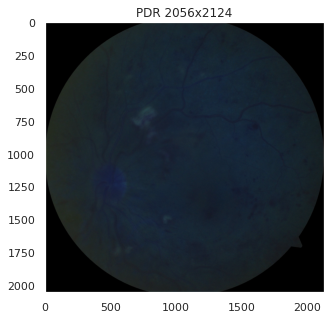

In [ ]:
img = os.listdir(os.path.join(train_dir, 'PDR'))[0]
old_image = cv2.imread(os.path.join(os.path.join(train_dir, 'PDR'), img), cv2.COLOR_BGR2RGB)
print(old_image.shape)
showImage(old_image, 'PDR {}x{}'.format(old_image.shape[0], old_image.shape[1]))

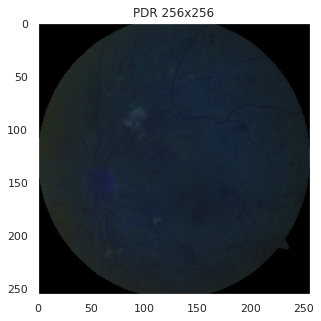

In [ ]:
"""
Resizing the image
"""
new_image = cv2.resize(old_image, (256, 256))
showImage(new_image, 'PDR {}x{}'.format(new_image.shape[0], new_image.shape[1]))

#### Image processing 
- Rescaling Image
- Image Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(rescale=1/255,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             vertical_flip = True,
                             horizontal_flip = True,
                             fill_mode='nearest',
                             validation_split = 0.2,
                             )

train_datagen = datagen.flow_from_directory(train_dir,
                                            target_size=(256, 256),
                                            batch_size=32,
                                            color_mode = 'rgb',
                                            shuffle=True,
                                            class_mode = 'categorical',
                                            subset = 'training')

validation_datagen = datagen.flow_from_directory(train_dir,
                                                 target_size=(256, 256),
                                                 batch_size=32,
                                                 color_mode='rgb',
                                                 shuffle=True,
                                                 class_mode='categorical',
                                                 subset = 'validation')

Found 485 images belonging to 7 classes.
Found 118 images belonging to 7 classes.


In [ ]:
train_class = train_datagen.classes
print(len(train_class))

485


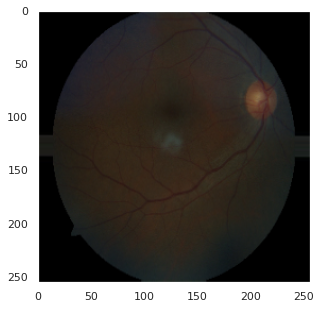

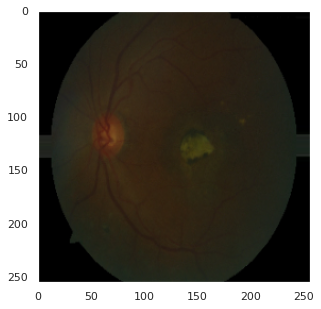

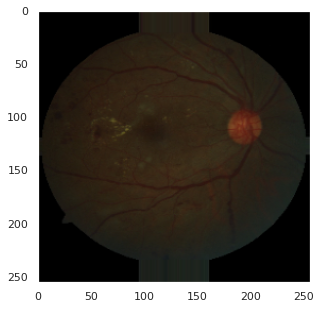

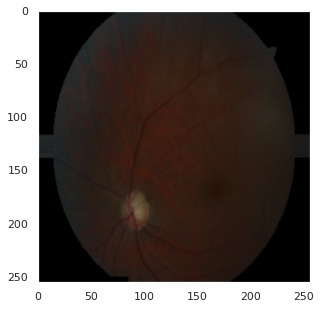

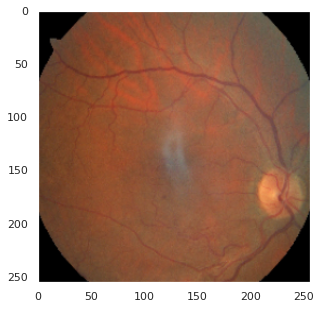

In [ ]:
'''
Showing augmeneted data
'''
img, label = train_datagen.next()
for i in range(5):
  showImage(img[i], '')

#### CNN Model Creation

In [ ]:
model = Sequential([
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', input_shape=(256,256,3)),
    Dropout(0.1),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.1),


    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.1),

    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.1),

    Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.1),

    Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.1),

    Flatten(),
    Dense(2048, activation='relu'),
    Dense(2048, activation='relu'),
    Dense(7, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 dropout (Dropout)           (None, 256, 256, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 128, 128, 64)      0         
                                                        

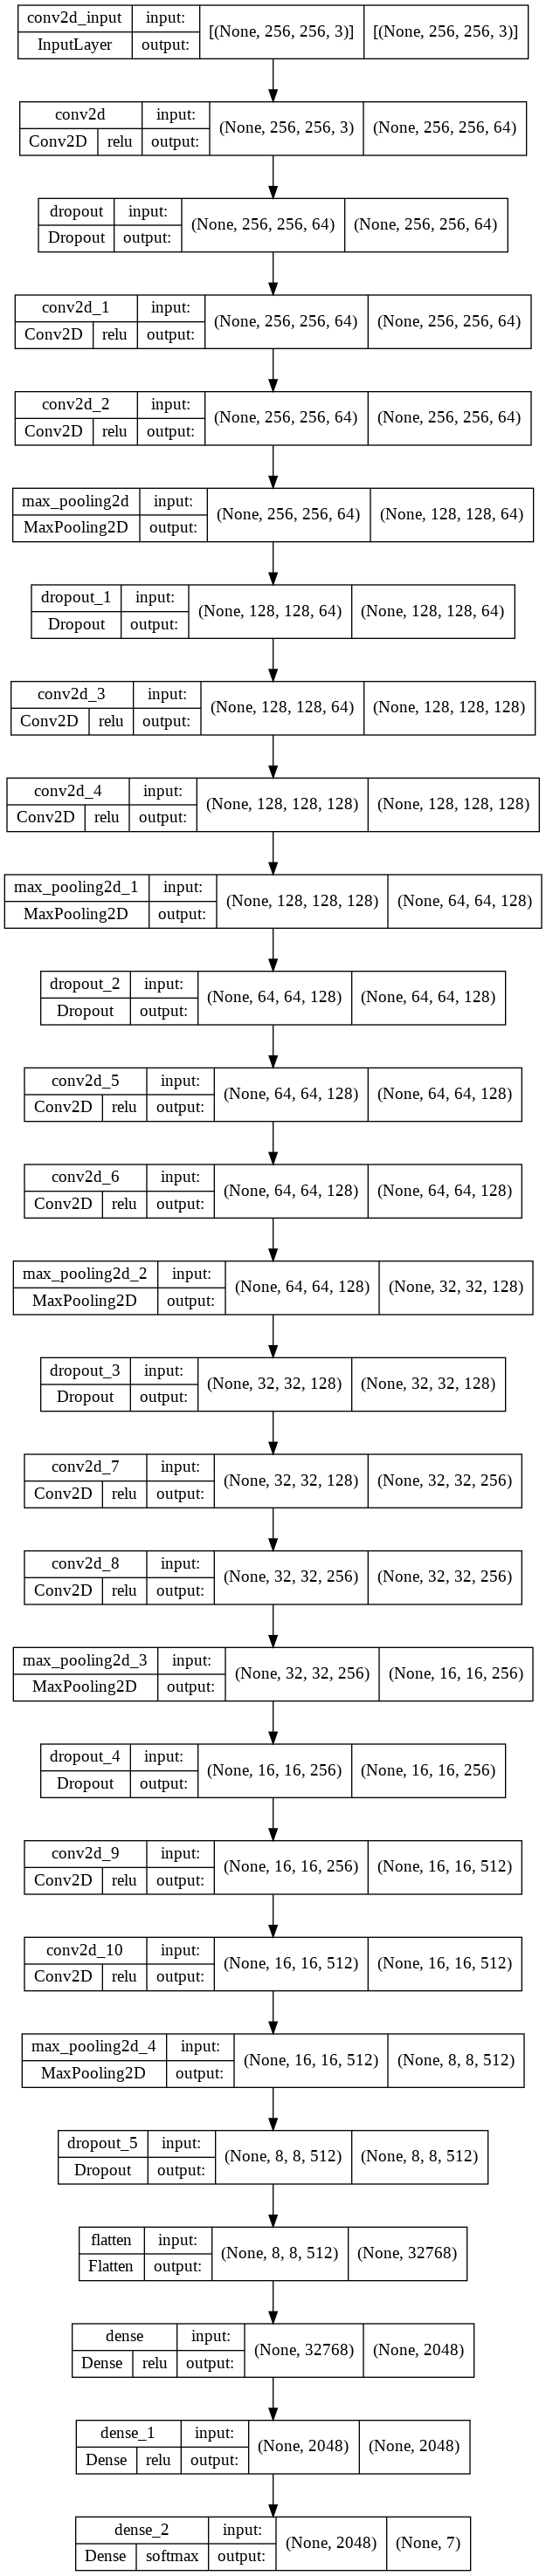

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4), loss='categorical_crossentropy', 
              metrics=['accuracy'])
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [ ]:
def Earlystopping_Checkpoint(modelname="diabetics_retionpathy_model.h5", ptence=30):
  checkpoint=ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/{}'.format(modelname),
                            monitor='val_loss',
                            mode='min',
                            save_best_only=True,
                            verbose=1)
  earlystop=EarlyStopping(monitor='val_loss',
                        min_delta=0.001,
                        patience=ptence,
                        verbose=1,
                        restore_best_weights=True)
  
  return [checkpoint, earlystop]

In [ ]:
callbacks = Earlystopping_Checkpoint()

In [ ]:
model_history = model.fit(train_datagen,
                    validation_data=validation_datagen,
                    epochs=100,
                    callbacks =callbacks)

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 1.8737 - accuracy: 0.2103
Epoch 1: val_loss improved from inf to 1.89316, saving model to /content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/diabetics_retionpathy_model.h5
8/8 [==============================] - 57s 7s/step - loss: 1.8737 - accuracy: 0.2103 - val_loss: 1.8932 - val_accuracy: 0.2373
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 1.7989 - accuracy: 0.2309
Epoch 2: val_loss improved from 1.89316 to 1.82265, saving model to /content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/diabetics_retionpathy_model.h5
8/8 [==============================] - 56s 8s/step - loss: 1.7989 - accuracy: 0.2309 - val_loss: 1.8226 - val_accuracy: 0.2373
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 1.7677 - accuracy: 0.2309
Epoch 3: val_loss improved from 1.82265 to 1.80814, saving model to /co

#### Model with filter (5, 5)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 256, 256, 64)      4864      
                                                                 
 dropout_18 (Dropout)        (None, 256, 256, 64)      0         
                                                                 
 conv2d_34 (Conv2D)          (None, 256, 256, 64)      102464    
                                                                 
 conv2d_35 (Conv2D)          (None, 256, 256, 64)      102464    
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 128, 128, 64)     0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 128, 128, 64)      0         
                                                      

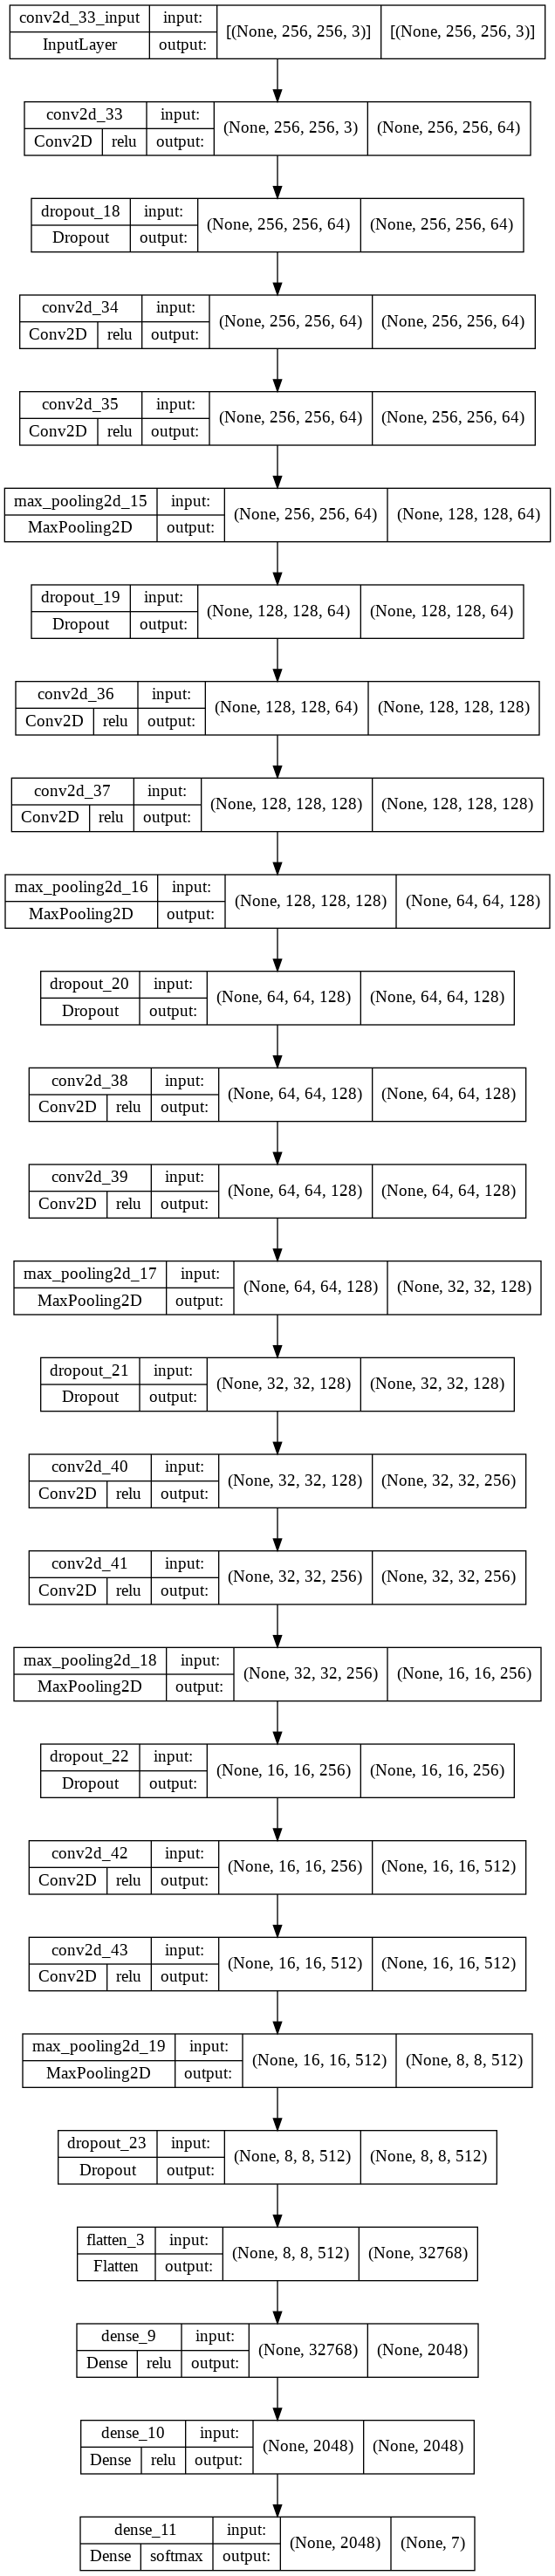

In [ ]:
model_extended = Sequential([
    Conv2D(filters=64, kernel_size=(5,5), activation='relu', padding='same', input_shape=(256,256,3)),
    Dropout(0.1),

    Conv2D(filters=64, kernel_size=(5,5), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(5,5), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.1),


    Conv2D(filters=128, kernel_size=(5,5), activation='relu', padding='same'),
    Conv2D(filters=128, kernel_size=(5,5), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.1),

    Conv2D(filters=128, kernel_size=(5,5), activation='relu', padding='same'),
    Conv2D(filters=128, kernel_size=(5,5), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.1),

    Conv2D(filters=256, kernel_size=(5,5), activation='relu', padding='same'),
    Conv2D(filters=256, kernel_size=(5,5), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.1),

    Conv2D(filters=512, kernel_size=(5,5), activation='relu', padding='same'),
    Conv2D(filters=512, kernel_size=(5,5), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.1),

    Flatten(),
    Dense(2048, activation='relu'),
    Dense(2048, activation='relu'),
    Dense(7, activation='softmax')
])
model_extended.summary()
plot_model(model_extended, to_file='model_extended.png', show_shapes=True, show_layer_names=True, show_layer_activations=True)

In [ ]:
model_extended.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4), loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
callbacks = Earlystopping_Checkpoint()

In [ ]:
model_history = model_extended.fit(train_datagen,
                    validation_data=validation_datagen,
                    epochs=100,
                    callbacks =callbacks)

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 1.9333 - accuracy: 0.2392 
Epoch 1: val_loss improved from inf to 1.93636, saving model to /content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/diabetics_retionpathy_model.h5
8/8 [==============================] - 414s 48s/step - loss: 1.9333 - accuracy: 0.2392 - val_loss: 1.9364 - val_accuracy: 0.2458
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 1.9156 - accuracy: 0.2474
Epoch 2: val_loss improved from 1.93636 to 1.89790, saving model to /content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/diabetics_retionpathy_model.h5
8/8 [==============================] - 56s 8s/step - loss: 1.9156 - accuracy: 0.2474 - val_loss: 1.8979 - val_accuracy: 0.2458
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 1.7877 - accuracy: 0.2412
Epoch 3: val_loss improved from 1.89790 to 1.82608, saving model to 

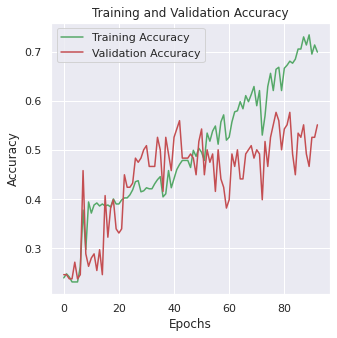

In [ ]:
train_accuracy = model_history.history['accuracy']
validation_accuracy = model_history.history['val_accuracy']
xc = range(callbacks[1].stopped_epoch+1)

showgraph(train_accuracy, validation_accuracy, xc, 'Training Accuracy', "Validation Accuracy", "Training and Validation Accuracy", "Epochs", "Accuracy")

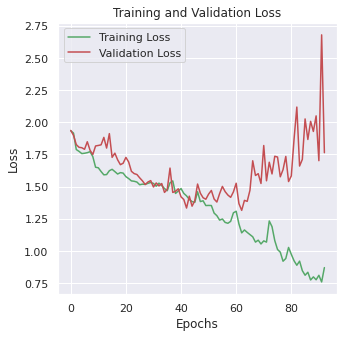

In [ ]:
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
xc = range(callbacks[1].stopped_epoch+1)

showgraph(train_loss, val_loss, xc, "Training Loss", "Validation Loss", "Training and Validation Loss", "Epochs", "Loss")

#### Result analysis

In [ ]:
def showgraph(train_res, val_res, xc, train_label=None, test_label=None, graphtitle=None, x_axislabel=None, y_axislabel=None):
  plt.figure(figsize=(5,5))
  plt.plot(xc, train_res, 'g', label=train_label)
  plt.plot(xc, val_res, 'r', label=test_label)
  plt.title(graphtitle)
  plt.xlabel(x_axislabel)
  plt.ylabel(y_axislabel)
  plt.legend()
  plt.show()

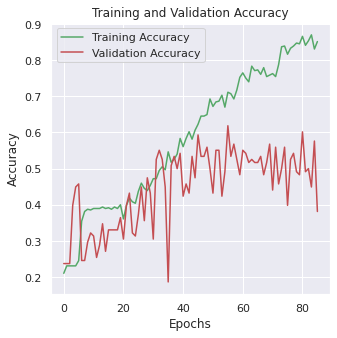

In [ ]:
train_accuracy = model_history.history['accuracy']
validation_accuracy = model_history.history['val_accuracy']
xc = range(callbacks[1].stopped_epoch+1)

showgraph(train_accuracy, validation_accuracy, xc, 'Training Accuracy', "Validation Accuracy", "Training and Validation Accuracy", "Epochs", "Accuracy")

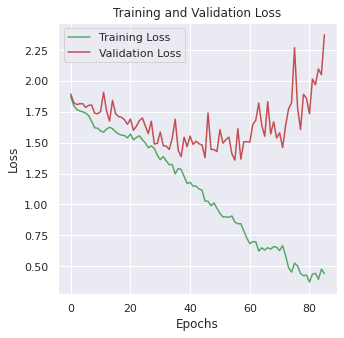

In [ ]:
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
xc = range(callbacks[1].stopped_epoch+1)

showgraph(train_loss, val_loss, xc, "Training Loss", "Validation Loss", "Training and Validation Loss", "Epochs", "Loss")

#### Testing pretrained model

In [ ]:
from tensorflow.keras.applications import VGG16
Ptmodel = VGG16(
    input_shape = (256, 256, 3),
    include_top = True, 
    weights = None, # 'imagenet')
    classes=7
)

In [ ]:
Ptmodel.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4), loss='categorical_crossentropy', 
              metrics=['accuracy'])

Ptmodel.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
Ptmodel_history = Ptmodel.fit(train_datagen,
                    validation_data=validation_datagen,
                    epochs=100,
                    callbacks =callbacks)

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 1.8831 - accuracy: 0.1979 
Epoch 1: val_loss improved from inf to 1.84227, saving model to /content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/diabetics_retionpathy_model.h5
8/8 [==============================] - 257s 29s/step - loss: 1.8831 - accuracy: 0.1979 - val_loss: 1.8423 - val_accuracy: 0.2373
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 1.7742 - accuracy: 0.2309
Epoch 2: val_loss did not improve from 1.84227
8/8 [==============================] - 51s 6s/step - loss: 1.7742 - accuracy: 0.2309 - val_loss: 1.9141 - val_accuracy: 0.2373
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 1.7694 - accuracy: 0.2309
Epoch 3: val_loss improved from 1.84227 to 1.83300, saving model to /content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/diabetics_retionpathy_model.h5
8/8 [================

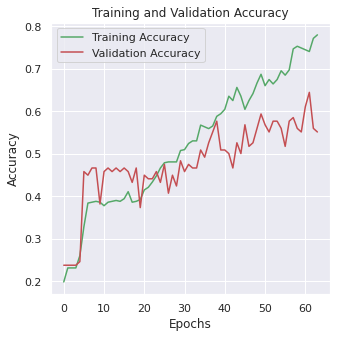

In [ ]:
train_accuracy = Ptmodel_history.history['accuracy']
validation_accuracy = Ptmodel_history.history['val_accuracy']
xc = range(callbacks[1].stopped_epoch+1)

plt.figure(figsize=(5,5))
plt.plot(xc, train_accuracy, 'g', label='Training Accuracy')
plt.plot(xc, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### model by using Xception

In [ ]:
pre_trained = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=(256, 256, 3)
)
for layer in pre_trained.layers:
  layer.trainable =False

83697664/83683744 [==============================] - 2s 0us/step


In [ ]:
tranfermodel0 = Sequential([
    pre_trained,
    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', input_shape=(256,256,3)),
    Dropout(0.1),

    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.1),

    Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.1),

    Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.1),

    Flatten(),
    Dense(2048, activation='relu'),
    Dense(2048, activation='relu'),
    Dense(7, activation='softmax')
])

In [ ]:
tranfermodel0.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4), loss='categorical_crossentropy', 
              metrics=['accuracy'])
tranfermodel0.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 128)         2359424   
                                                                 
 dropout_6 (Dropout)         (None, 8, 8, 128)         0         
                                                                 
 conv2d_16 (Conv2D)          (None, 8, 8, 128)         147584    
                                                                 
 conv2d_17 (Conv2D)          (None, 8, 8, 128)         147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 128)        0         
 2D)                                                             
                                                      

In [ ]:
callbacks = Earlystopping_Checkpoint("ptmodel0.h5", 20)

model_history = tranfermodel0.fit(train_datagen,
                    validation_data=validation_datagen,
                    epochs=100,
                    callbacks =callbacks)

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 1.8651 - accuracy: 0.2412 
Epoch 1: val_loss improved from inf to 1.79948, saving model to /content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/ptmodel0.h5
8/8 [==============================] - 420s 57s/step - loss: 1.8651 - accuracy: 0.2412 - val_loss: 1.7995 - val_accuracy: 0.2458
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 1.7833 - accuracy: 0.2474
Epoch 2: val_loss improved from 1.79948 to 1.70689, saving model to /content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/ptmodel0.h5
8/8 [==============================] - 44s 6s/step - loss: 1.7833 - accuracy: 0.2474 - val_loss: 1.7069 - val_accuracy: 0.2458
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 1.7271 - accuracy: 0.3072
Epoch 3: val_loss improved from 1.70689 to 1.65752, saving model to /content/drive/MyDrive/Colab Notebooks

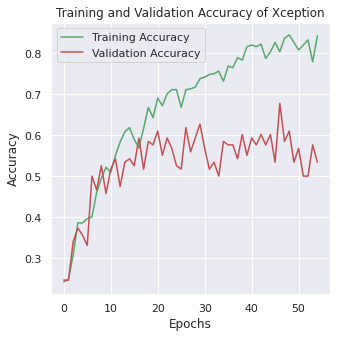

In [ ]:
train_accuracy = model_history.history['accuracy']
validation_accuracy = model_history.history['val_accuracy']
xc = range(callbacks[1].stopped_epoch+1)

showgraph(train_accuracy, validation_accuracy, xc, 'Training Accuracy', "Validation Accuracy", "Training and Validation Accuracy of Xception", "Epochs", "Accuracy")

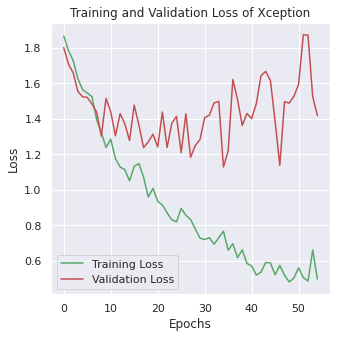

In [ ]:
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
xc = range(callbacks[1].stopped_epoch+1)

showgraph(train_loss, val_loss, xc, "Training Loss", "Validation Loss", "Training and Validation Loss of Xception", "Epochs", "Loss")

#### Xception with only dense layer

In [ ]:
xception_pre = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=(256, 256, 3)
)
for layer in xception_pre.layers:
  layer.trainable =False

In [ ]:
tranfermodel_with_dense = Sequential([
    xception_pre,

    Flatten(),
    Dense(2048, activation='relu'),
    Dropout(0.1),
    Dense(2048, activation='relu'),
    Dense(7, activation='softmax')
])

In [ ]:
tranfermodel_with_dense.compile(optimizer = tf.keras.optimizers.Adam(), loss='categorical_crossentropy', 
              metrics=['accuracy'])
tranfermodel_with_dense.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 flatten_7 (Flatten)         (None, 131072)            0         
                                                                 
 dense_21 (Dense)            (None, 2048)              268437504 
                                                                 
 dropout_27 (Dropout)        (None, 2048)              0         
                                                                 
 dense_22 (Dense)            (None, 2048)              4196352   
                                                                 
 dense_23 (Dense)            (None, 7)                 14343     
                                                                 
Total params: 293,509,679
Trainable params: 272,648,19

In [ ]:
callbacks = Earlystopping_Checkpoint("xceptiondense.h5", 20)

In [ ]:
model_history = tranfermodel_with_dense.fit(train_datagen,
                    validation_data=validation_datagen,
                    epochs=100,
                    callbacks =callbacks)

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 110.0829 - accuracy: 0.1691
Epoch 1: val_loss improved from inf to 9.60517, saving model to /content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/xceptiondense.h5
8/8 [==============================] - 67s 8s/step - loss: 110.0829 - accuracy: 0.1691 - val_loss: 9.6052 - val_accuracy: 0.3136
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 7.2622 - accuracy: 0.2928
Epoch 2: val_loss improved from 9.60517 to 3.64054, saving model to /content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/xceptiondense.h5
8/8 [==============================] - 64s 8s/step - loss: 7.2622 - accuracy: 0.2928 - val_loss: 3.6405 - val_accuracy: 0.3729
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 2.3686 - accuracy: 0.3567
Epoch 3: val_loss improved from 3.64054 to 1.66669, saving model to /content/drive/MyDrive/Cola

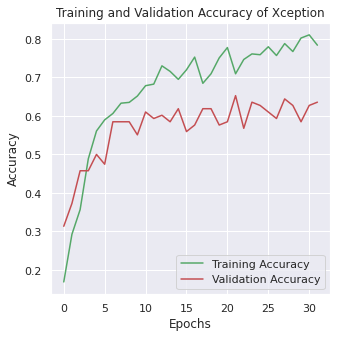

In [ ]:
train_accuracy = model_history.history['accuracy']
validation_accuracy = model_history.history['val_accuracy']
xc = range(callbacks[1].stopped_epoch+1)

showgraph(train_accuracy, validation_accuracy, xc, 'Training Accuracy', "Validation Accuracy", "Training and Validation Accuracy of Xception", "Epochs", "Accuracy")

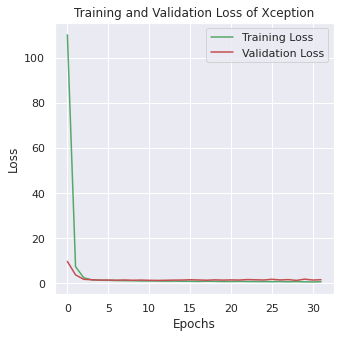

In [ ]:
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
xc = range(callbacks[1].stopped_epoch+1)

showgraph(train_loss, val_loss, xc, "Training Loss", "Validation Loss", "Training and Validation Loss of Xception", "Epochs", "Loss")

#### model by using efficientnetv2l

In [ ]:
pre_trained = tf.keras.applications.EfficientNetV2L(
    include_top=False,
    weights="imagenet",
    input_shape=(256, 256, 3)
)

for layer in pre_trained.layers:
  layer.trainable =False

In [ ]:
tranfermodel1 = Sequential([
    pre_trained,
    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
    Dropout(0.1),

    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.1),

    Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.1),

    Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.1),

    Flatten(),
    Dense(2048, activation='relu'),
    Dense(2048, activation='relu'),
    Dense(7, activation='softmax')
])

In [ ]:
tranfermodel1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4), loss='categorical_crossentropy', 
              metrics=['accuracy'])
tranfermodel1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-l (Functiona  (None, 8, 8, 1280)       117746848 
 l)                                                              
                                                                 
 conv2d_62 (Conv2D)          (None, 8, 8, 128)         1474688   
                                                                 
 dropout_34 (Dropout)        (None, 8, 8, 128)         0         
                                                                 
 conv2d_63 (Conv2D)          (None, 8, 8, 128)         147584    
                                                                 
 conv2d_64 (Conv2D)          (None, 8, 8, 128)         147584    
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 4, 4, 128)        0         
 g2D)                                                 

In [ ]:
callbacks = Earlystopping_Checkpoint("ptmodel.h5", 10)

model_history = tranfermodel1.fit(train_datagen,
                    validation_data=validation_datagen,
                    epochs=50,
                    callbacks =callbacks)

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 1.8380 - accuracy: 0.2763
Epoch 1: val_loss improved from inf to 1.80234, saving model to /content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/ptmodel.h5
8/8 [==============================] - 84s 8s/step - loss: 1.8380 - accuracy: 0.2763 - val_loss: 1.8023 - val_accuracy: 0.2458
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 1.8027 - accuracy: 0.2454
Epoch 2: val_loss improved from 1.80234 to 1.74767, saving model to /content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/ptmodel.h5
8/8 [==============================] - 60s 8s/step - loss: 1.8027 - accuracy: 0.2454 - val_loss: 1.7477 - val_accuracy: 0.2458
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 1.7942 - accuracy: 0.2474
Epoch 3: val_loss did not improve from 1.74767
8/8 [==============================] - 43s 5s/step - loss: 1.7942 -

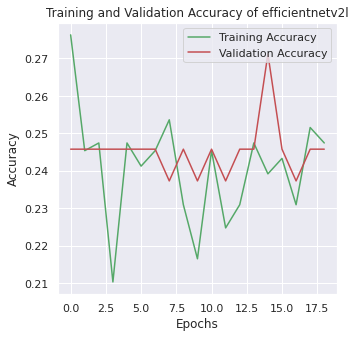

In [ ]:
train_accuracy = model_history.history['accuracy']
validation_accuracy = model_history.history['val_accuracy']
xc = range(callbacks[1].stopped_epoch+1)

showgraph(train_accuracy, validation_accuracy, xc, 'Training Accuracy', "Validation Accuracy", "Training and Validation Accuracy of efficientnetv2l", "Epochs", "Accuracy")

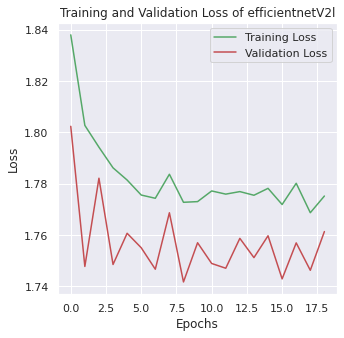

In [ ]:
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
xc = range(callbacks[1].stopped_epoch+1)

showgraph(train_loss, val_loss, xc, "Training Loss", "Validation Loss", "Training and Validation Loss of efficientnetV2l", "Epochs", "Loss")

#### EfficientNetV2L only with Dense

In [ ]:
efficient_dense = tf.keras.applications.EfficientNetV2L(
    include_top=False,
    weights="imagenet",
    input_shape=(256, 256, 3)
)

for layer in efficient_dense.layers:
  layer.trainable =False

In [ ]:
efficient_net_dense = Sequential([
    efficient_dense,

    Flatten(),
    Dense(2048, activation='relu'),
    Dense(2048, activation='relu'),
    Dense(7, activation='softmax')
])

In [ ]:
efficient_net_dense.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4), loss='categorical_crossentropy', 
              metrics=['accuracy'])
efficient_net_dense.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-l (Functiona  (None, 8, 8, 1280)       117746848 
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 81920)             0         
                                                                 
 dense (Dense)               (None, 2048)              167774208 
                                                                 
 dense_1 (Dense)             (None, 2048)              4196352   
                                                                 
 dense_2 (Dense)             (None, 7)                 14343     
                                                                 
Total params: 289,731,751
Trainable params: 171,984,903
Non-trainable params: 117,746,848
________________________________

In [ ]:
callbacks = Earlystopping_Checkpoint("efficient.h5", 20)

model_history = efficient_net_dense.fit(train_datagen,
                    validation_data=validation_datagen,
                    epochs=100,
                    callbacks =callbacks)

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 14.2727 - accuracy: 0.1856
Epoch 1: val_loss improved from inf to 8.86740, saving model to /content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/efficient.h5
8/8 [==============================] - 106s 10s/step - loss: 14.2727 - accuracy: 0.1856 - val_loss: 8.8674 - val_accuracy: 0.2373
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 6.0935 - accuracy: 0.2247
Epoch 2: val_loss improved from 8.86740 to 3.68285, saving model to /content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/efficient.h5
8/8 [==============================] - 64s 8s/step - loss: 6.0935 - accuracy: 0.2247 - val_loss: 3.6829 - val_accuracy: 0.1441
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 3.3370 - accuracy: 0.1340
Epoch 3: val_loss improved from 3.68285 to 3.36052, saving model to /content/drive/MyDrive/Colab Notebo

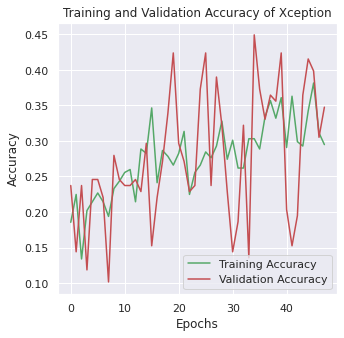

In [ ]:
train_accuracy = model_history.history['accuracy']
validation_accuracy = model_history.history['val_accuracy']
xc = range(callbacks[1].stopped_epoch+1)

showgraph(train_accuracy, validation_accuracy, xc, 'Training Accuracy', "Validation Accuracy", "Training and Validation Accuracy of Xception", "Epochs", "Accuracy")

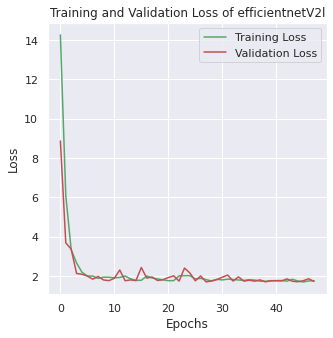

In [ ]:
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
xc = range(callbacks[1].stopped_epoch+1)

showgraph(train_loss, val_loss, xc, "Training Loss", "Validation Loss", "Training and Validation Loss of efficientnetV2l", "Epochs", "Loss")

#### Model by using VGG16





In [ ]:
pre_trained = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(256, 256, 3)
)
for layer in pre_trained.layers:
  layer.trainable =False

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
tranfermodel2 = Sequential([
    pre_trained,
    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', input_shape=(256,256,3)),
    Dropout(0.1),

    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.1),

    Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.1),

    Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Dropout(0.1),

    Flatten(),
    Dense(2048, activation='relu'),
    Dense(2048, activation='relu'),
    Dense(7, activation='softmax')
])

In [ ]:
tranfermodel2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4), loss='categorical_crossentropy', 
              metrics=['accuracy'])
tranfermodel2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 conv2d_29 (Conv2D)          (None, 8, 8, 128)         589952    
                                                                 
 dropout_16 (Dropout)        (None, 8, 8, 128)         0         
                                                                 
 conv2d_30 (Conv2D)          (None, 8, 8, 128)         147584    
                                                                 
 conv2d_31 (Conv2D)          (None, 8, 8, 128)         147584    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 4, 4, 128)        0         
 g2D)                                                            
                                                      

In [ ]:
callbacks = Earlystopping_Checkpoint("ptmodel2_VGG16.h5", 20)

model_history = tranfermodel2.fit(train_datagen,
                    validation_data=validation_datagen,
                    epochs=100,
                    callbacks =callbacks)

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 1.8577 - accuracy: 0.2351 
Epoch 1: val_loss improved from inf to 1.76845, saving model to /content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/ptmodel2_VGG16.h5
8/8 [==============================] - 250s 32s/step - loss: 1.8577 - accuracy: 0.2351 - val_loss: 1.7685 - val_accuracy: 0.2373
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 1.7998 - accuracy: 0.1918
Epoch 2: val_loss did not improve from 1.76845
8/8 [==============================] - 42s 5s/step - loss: 1.7998 - accuracy: 0.1918 - val_loss: 1.7959 - val_accuracy: 0.2458
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 1.7979 - accuracy: 0.2474
Epoch 3: val_loss did not improve from 1.76845
8/8 [==============================] - 40s 5s/step - loss: 1.7979 - accuracy: 0.2474 - val_loss: 1.7749 - val_accuracy: 0.2542
Epoch 4/100
8/8 [==============================] - ETA: 0s -

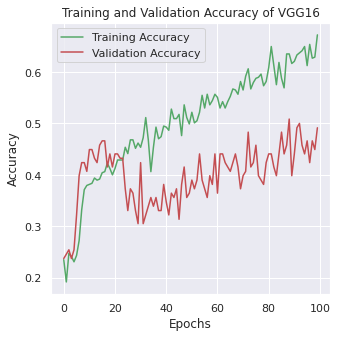

In [ ]:
train_accuracy = model_history.history['accuracy']
validation_accuracy = model_history.history['val_accuracy']
xc = range(100)

showgraph(train_accuracy, validation_accuracy, xc, 'Training Accuracy', "Validation Accuracy", "Training and Validation Accuracy of VGG16", "Epochs", "Accuracy")

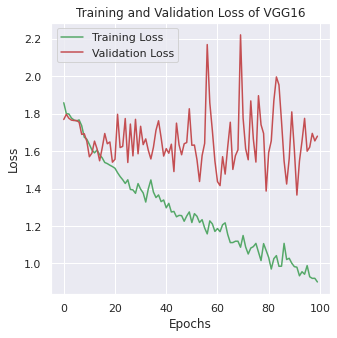

In [ ]:
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
xc = range(100)

showgraph(train_loss, val_loss, xc, "Training Loss", "Validation Loss", "Training and Validation Loss of VGG16", "Epochs", "Loss")

#### VGG16 with only dense.

In [ ]:
VGG16 = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(256, 256, 3)
)
for layer in VGG16.layers:
  layer.trainable =False

In [ ]:
VGG16_dense = Sequential([
    VGG16,

    Flatten(),
    Dense(2048, activation='relu'),
    Dropout(0.1),
    Dense(2048, activation='relu'),
    Dense(7, activation='softmax')
])

In [ ]:
VGG16_dense.compile(optimizer = tf.keras.optimizers.Adam(), loss='categorical_crossentropy', 
              metrics=['accuracy'])
VGG16_dense.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_3 (Dense)             (None, 2048)              67110912  
                                                                 
 dropout_6 (Dropout)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 2048)              4196352   
                                                                 
 dense_5 (Dense)             (None, 7)                 14343     
                                                                 
Total params: 86,036,295
Trainable params: 71,321,607


In [ ]:
callbacks = Earlystopping_Checkpoint("VGG16_dense.h5", 20)

model_history = VGG16_dense.fit(train_datagen,
                    validation_data=validation_datagen,
                    epochs=100,
                    callbacks =callbacks)

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 9.1594 - accuracy: 0.2371 
Epoch 1: val_loss improved from inf to 2.57943, saving model to /content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/VGG16_dense.h5
8/8 [==============================] - 114s 15s/step - loss: 9.1594 - accuracy: 0.2371 - val_loss: 2.5794 - val_accuracy: 0.3220
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 1.9632 - accuracy: 0.2577
Epoch 2: val_loss improved from 2.57943 to 1.70010, saving model to /content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/VGG16_dense.h5
8/8 [==============================] - 58s 8s/step - loss: 1.9632 - accuracy: 0.2577 - val_loss: 1.7001 - val_accuracy: 0.4153
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 1.6796 - accuracy: 0.3196
Epoch 3: val_loss did not improve from 1.70010
8/8 [==============================] - 49s 6s/step - 

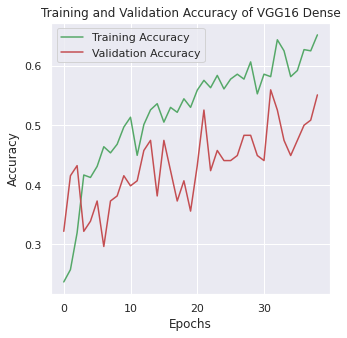

In [ ]:
train_accuracy = model_history.history['accuracy']
validation_accuracy = model_history.history['val_accuracy']
xc = range(callbacks[1].stopped_epoch + 1)

showgraph(train_accuracy, validation_accuracy, xc, 'Training Accuracy', "Validation Accuracy", "Training and Validation Accuracy of VGG16 Dense", "Epochs", "Accuracy")

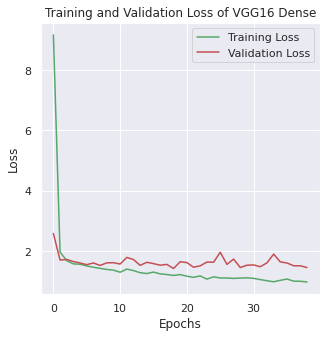

In [ ]:
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
xc = range(callbacks[1].stopped_epoch + 1)

showgraph(train_loss, val_loss, xc, "Training Loss", "Validation Loss", "Training and Validation Loss of VGG16 Dense", "Epochs", "Loss")

#### EfficientnetB4 model with custom dense

In [ ]:
EfficientnetB4 = tf.keras.applications.EfficientNetB4(
    include_top=False,
    weights="imagenet",
    input_shape=(256, 256, 3)
)

for layer in EfficientnetB4.layers:
  layer.trainable = False

71696384/71686520 [==============================] - 0s 0us/step


In [ ]:
EfficientnetB4_dense = Sequential([
    EfficientnetB4,

    Flatten(),
    Dense(2048, activation="relu"),
    Dropout(0.1),
    Dense(2048, activation="relu"),
    Dense(7, activation="softmax")
])

In [ ]:
EfficientnetB4_dense.compile(optimizer = tf.keras.optimizers.Adam(), loss='categorical_crossentropy', 
              metrics=['accuracy'])
EfficientnetB4_dense.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb4 (Functional)  (None, 8, 8, 1792)       17673823  
                                                                 
 flatten_2 (Flatten)         (None, 114688)            0         
                                                                 
 dense_6 (Dense)             (None, 2048)              234883072 
                                                                 
 dropout_7 (Dropout)         (None, 2048)              0         
                                                                 
 dense_7 (Dense)             (None, 2048)              4196352   
                                                                 
 dense_8 (Dense)             (None, 7)                 14343     
                                                                 
Total params: 256,767,590
Trainable params: 239,093,76

In [ ]:
callbacks = Earlystopping_Checkpoint("efficientnetB4.h5", 20)

EfficientnetB4_dense.fit(train_datagen,
                         validation_data=validation_datagen,
                         epochs=100,
                         callbacks=callbacks)

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 107.6026 - accuracy: 0.1670
Epoch 1: val_loss improved from inf to 24.77292, saving model to /content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/efficientnetB4.h5
8/8 [==============================] - 78s 8s/step - loss: 107.6026 - accuracy: 0.1670 - val_loss: 24.7729 - val_accuracy: 0.2458
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 14.9536 - accuracy: 0.1773
Epoch 2: val_loss improved from 24.77292 to 9.00621, saving model to /content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/efficientnetB4.h5
8/8 [==============================] - 83s 11s/step - loss: 14.9536 - accuracy: 0.1773 - val_loss: 9.0062 - val_accuracy: 0.2458
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 5.2306 - accuracy: 0.1546
Epoch 3: val_loss improved from 9.00621 to 1.91530, saving model to /content/drive/MyDr

#### InceptionResnetV2 model

In [ ]:
inecptionresnetv2 = tf.keras.applications.InceptionResNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=(256, 256, 3)
)

for layer in inecptionresnetv2.layers:
  layer.trainable = False

219070464/219055592 [==============================] - 2s 0us/step


In [ ]:
inecptionresnetv2_dense = Sequential([
    inecptionresnetv2,

    Flatten(),
    Dense(2048, activation='relu'),
    Dropout(0.1),
    Dense(2048, activation='relu'),
    Dense(7, activation='softmax')
])

In [ ]:
inecptionresnetv2_dense.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy',
                                metrics=['accuracy'])

inecptionresnetv2_dense.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 6, 6, 1536)       54336736  
 onal)                                                           
                                                                 
 flatten_3 (Flatten)         (None, 55296)             0         
                                                                 
 dense_9 (Dense)             (None, 2048)              113248256 
                                                                 
 dropout_8 (Dropout)         (None, 2048)              0         
                                                                 
 dense_10 (Dense)            (None, 2048)              4196352   
                                                                 
 dense_11 (Dense)            (None, 7)                 14343     
                                                      

In [ ]:
callbacks = Earlystopping_Checkpoint('inceptionresnetv2.h5', 20)

model_history = inecptionresnetv2_dense.fit(train_datagen,
                                            validation_data=validation_datagen,
                                            epochs=100,
                                            callbacks=callbacks)

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 116.5584 - accuracy: 0.1753
Epoch 1: val_loss improved from inf to 13.27721, saving model to /content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/inceptionresnetv2.h5
8/8 [==============================] - 71s 8s/step - loss: 116.5584 - accuracy: 0.1753 - val_loss: 13.2772 - val_accuracy: 0.2542
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 8.4746 - accuracy: 0.2887
Epoch 2: val_loss improved from 13.27721 to 2.85612, saving model to /content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/inceptionresnetv2.h5
8/8 [==============================] - 73s 10s/step - loss: 8.4746 - accuracy: 0.2887 - val_loss: 2.8561 - val_accuracy: 0.2881
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 2.9180 - accuracy: 0.3361
Epoch 3: val_loss improved from 2.85612 to 1.93275, saving model to /content/drive/

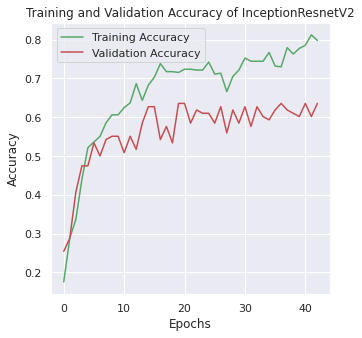

In [ ]:
train_accuracy = model_history.history['accuracy']
validation_accuracy = model_history.history['val_accuracy']
xc = range(callbacks[1].stopped_epoch+1)

showgraph(train_accuracy, validation_accuracy, xc, 'Training Accuracy', "Validation Accuracy", "Training and Validation Accuracy of InceptionResnetV2", "Epochs", "Accuracy")

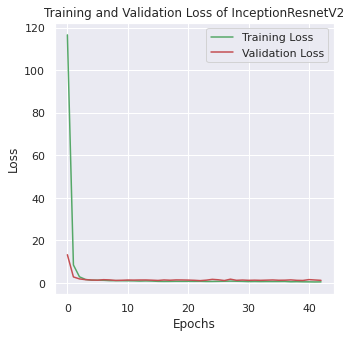

In [ ]:
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
xc = range(callbacks[1].stopped_epoch+1)

showgraph(train_loss, val_loss, xc, "Training Loss", "Validation Loss", "Training and Validation Loss of InceptionResnetV2", "Epochs", "Loss")

#### VGG19with custom dense

In [ ]:
VGG19 = tf.keras.applications.VGG19(
    include_top = False,
    weights="imagenet",
    input_shape=(256, 256, 3)
)

for layer in VGG19.layers:
  layer.trainable = False

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
VGG19_dense = Sequential([
    VGG19,

    Flatten(),
    Dense(2048, activation='relu'),
    Dropout(0.1),
    Dense(2048, activation='relu'),
    Dense(7, activation='softmax')
])

In [ ]:
VGG19_dense.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy',
                              metrics=['accuracy'])
VGG19_dense.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 8, 8, 512)         20024384  
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_6 (Dense)             (None, 2048)              67110912  
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 dense_7 (Dense)             (None, 2048)              4196352   
                                                                 
 dense_8 (Dense)             (None, 7)                 14343     
                                                                 
Total params: 91,345,991
Trainable params: 71,321,607


In [ ]:
callbacks = Earlystopping_Checkpoint('vgg19.h5', 20)
model_history = VGG19_dense.fit(train_datagen,
                                         validation_data=validation_datagen,
                                         epochs=100,
                                         callbacks=callbacks)

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 26.8353 - accuracy: 0.1134
Epoch 1: val_loss improved from inf to 2.44070, saving model to /content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/vgg19.h5
8/8 [==============================] - 62s 7s/step - loss: 26.8353 - accuracy: 0.1134 - val_loss: 2.4407 - val_accuracy: 0.2797
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 2.7395 - accuracy: 0.2103
Epoch 2: val_loss improved from 2.44070 to 2.10414, saving model to /content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/vgg19.h5
8/8 [==============================] - 57s 8s/step - loss: 2.7395 - accuracy: 0.2103 - val_loss: 2.1041 - val_accuracy: 0.2458
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 1.8430 - accuracy: 0.3196
Epoch 3: val_loss improved from 2.10414 to 1.77626, saving model to /content/drive/MyDrive/Colab Notebooks/Patter

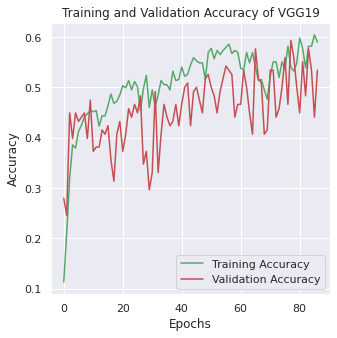

In [ ]:
train_accuracy = model_history.history['accuracy']
validation_accuracy = model_history.history['val_accuracy']
xc = range(callbacks[1].stopped_epoch+1)

showgraph(train_accuracy, validation_accuracy, xc, 'Training Accuracy', "Validation Accuracy", "Training and Validation Accuracy of VGG19", "Epochs", "Accuracy")

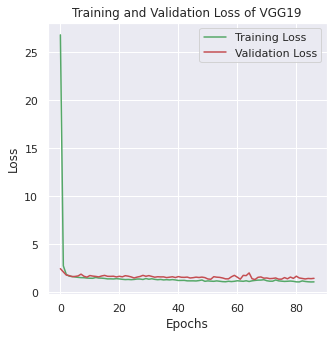

In [ ]:
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
xc = range(callbacks[1].stopped_epoch+1)

showgraph(train_loss, val_loss, xc, "Training Loss", "Validation Loss", "Training and Validation Loss of VGG19", "Epochs", "Loss")

#### Resnet50v2 with custom dense

In [ ]:
resenet50 = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights="imagenet",
    input_shape=(256,256,3)
)

for layer in resenet50.layers:
  layer.trainable = False

94683136/94668760 [==============================] - 1s 0us/step


In [ ]:
resnet50_dense = Sequential([
    resenet50,

    Flatten(),
    Dense(2048, activation='relu'),
    Dropout(0.1),
    Dense(2048, activation='relu'),
    Dense(7, activation='softmax')
])

In [ ]:
resnet50_dense.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy',
                              metrics=['accuracy'])
resnet50_dense.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 8, 8, 2048)        23564800  
                                                                 
 flatten_18 (Flatten)        (None, 131072)            0         
                                                                 
 dense_15 (Dense)            (None, 2048)              268437504 
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_16 (Dense)            (None, 2048)              4196352   
                                                                 
 dense_17 (Dense)            (None, 7)                 14343     
                                                                 
Total params: 296,212,999
Trainable params: 272,648,199


In [ ]:
callbacks = Earlystopping_Checkpoint('resenet50.h5', 20)
model_history = resnet50_dense.fit(train_datagen,
                                         validation_data=validation_datagen,
                                         epochs=100,
                                         callbacks=callbacks)

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 88.0600 - accuracy: 0.2124
Epoch 1: val_loss improved from inf to 10.39704, saving model to /content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/resenet50.h5
8/8 [==============================] - 68s 8s/step - loss: 88.0600 - accuracy: 0.2124 - val_loss: 10.3970 - val_accuracy: 0.3305
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 6.8319 - accuracy: 0.3237
Epoch 2: val_loss improved from 10.39704 to 2.77681, saving model to /content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/resenet50.h5
8/8 [==============================] - 73s 10s/step - loss: 6.8319 - accuracy: 0.3237 - val_loss: 2.7768 - val_accuracy: 0.3475
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 2.3007 - accuracy: 0.3918
Epoch 3: val_loss improved from 2.77681 to 1.71483, saving model to /content/drive/MyDrive/Colab Note

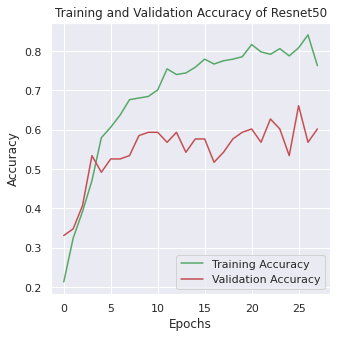

In [ ]:
train_accuracy = model_history.history['accuracy']
validation_accuracy = model_history.history['val_accuracy']
xc = range(callbacks[1].stopped_epoch+1)

showgraph(train_accuracy, validation_accuracy, xc, 'Training Accuracy', "Validation Accuracy", "Training and Validation Accuracy of Resnet50", "Epochs", "Accuracy")

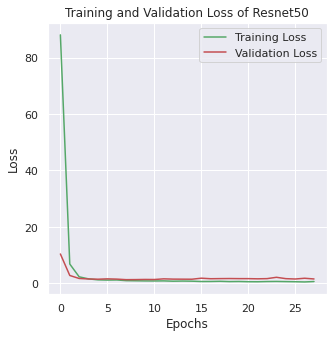

In [ ]:
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
xc = range(callbacks[1].stopped_epoch+1)

showgraph(train_loss, val_loss, xc, "Training Loss", "Validation Loss", "Training and Validation Loss of Resnet50", "Epochs", "Loss")

#### Mobilenetv2 custom dense

In [ ]:
mobilenetv2 = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=(256, 256, 3)
)

for layer in mobilenetv2.layers:
  layer.trainable = False

In [ ]:
mobilenetv2_dense = Sequential([
    mobilenetv2,

    Flatten(),
    Dense(2048, activation='relu'),
    Dropout(0.1),
    Dense(2048, activation='relu'),
    Dense(7, activation='softmax')
])

In [ ]:
mobilenetv2_dense.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy',
                              metrics=['accuracy'])
mobilenetv2_dense.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 81920)             0         
                                                                 
 dense (Dense)               (None, 2048)              167774208 
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 2048)              4196352   
                                                                 
 dense_2 (Dense)             (None, 7)                 14343     
                                                        

In [ ]:
callbacks = Earlystopping_Checkpoint('mobilenetv2.h5', 20)
model_history = mobilenetv2_dense.fit(train_datagen,
                                         validation_data=validation_datagen,
                                         epochs=100,
                                         callbacks=callbacks)

Epoch 1/100
16/16 [==============================] - ETA: 0s - loss: 53.5653 - accuracy: 0.2041
Epoch 1: val_loss improved from inf to 6.11642, saving model to /content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/mobilenetv2.h5
16/16 [==============================] - 225s 13s/step - loss: 53.5653 - accuracy: 0.2041 - val_loss: 6.1164 - val_accuracy: 0.1441
Epoch 2/100
16/16 [==============================] - ETA: 0s - loss: 2.3302 - accuracy: 0.4412
Epoch 2: val_loss improved from 6.11642 to 2.14831, saving model to /content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/mobilenetv2.h5
16/16 [==============================] - 64s 4s/step - loss: 2.3302 - accuracy: 0.4412 - val_loss: 2.1483 - val_accuracy: 0.3136
Epoch 3/100
16/16 [==============================] - ETA: 0s - loss: 1.4555 - accuracy: 0.5196
Epoch 3: val_loss improved from 2.14831 to 2.08613, saving model to /content/drive/MyDriv

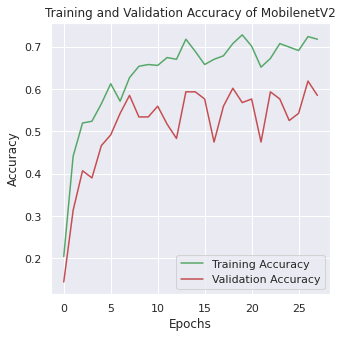

In [ ]:
train_accuracy = model_history.history['accuracy']
validation_accuracy = model_history.history['val_accuracy']
xc = range(callbacks[1].stopped_epoch+1)

showgraph(train_accuracy, validation_accuracy, xc, 'Training Accuracy', "Validation Accuracy", "Training and Validation Accuracy of MobilenetV2", "Epochs", "Accuracy")

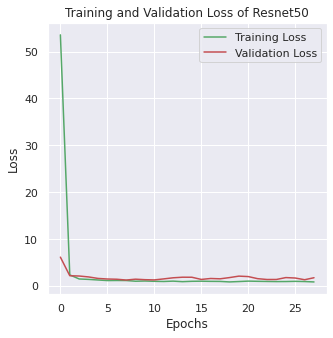

In [ ]:
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
xc = range(callbacks[1].stopped_epoch+1)

showgraph(train_loss, val_loss, xc, "Training Loss", "Validation Loss", "Training and Validation Loss of Resnet50", "Epochs", "Loss")

#### Densenet201 with custom dense

In [ ]:
densenet201 = tf.keras.applications.DenseNet201(
    include_top=False,
    weights="imagenet",
    input_shape=(256, 256, 3)
)

for layer in densenet201.layers:
  layer.trainable = False

In [ ]:
densenet201_dense = Sequential([
    densenet201,

    Flatten(),
    Dense(2048, activation='relu'),
    Dense(2048, activation='relu'),
    Dense(7, activation='softmax')
])

In [ ]:
densenet201_dense.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy',
                              metrics=['accuracy'])
densenet201_dense.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 8, 8, 1920)        18321984  
                                                                 
 flatten_3 (Flatten)         (None, 122880)            0         
                                                                 
 dense_9 (Dense)             (None, 2048)              251660288 
                                                                 
 dense_10 (Dense)            (None, 2048)              4196352   
                                                                 
 dense_11 (Dense)            (None, 7)                 14343     
                                                                 
Total params: 274,192,967
Trainable params: 255,870,983
Non-trainable params: 18,321,984
_________________________________________________________________


In [ ]:
callbacks = Earlystopping_Checkpoint('densenet201.h5', 20)
model_history = densenet201_dense.fit(train_datagen,
                                         validation_data=validation_datagen,
                                         epochs=100,
                                         callbacks=callbacks)

Epoch 1/100
16/16 [==============================] - ETA: 0s - loss: 54.1260 - accuracy: 0.2495
Epoch 1: val_loss improved from inf to 5.70074, saving model to /content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/densenet201.h5
16/16 [==============================] - 79s 4s/step - loss: 54.1260 - accuracy: 0.2495 - val_loss: 5.7007 - val_accuracy: 0.2627
Epoch 2/100
16/16 [==============================] - ETA: 0s - loss: 2.4937 - accuracy: 0.4268
Epoch 2: val_loss improved from 5.70074 to 1.67913, saving model to /content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/densenet201.h5
16/16 [==============================] - 80s 5s/step - loss: 2.4937 - accuracy: 0.4268 - val_loss: 1.6791 - val_accuracy: 0.4661
Epoch 3/100
16/16 [==============================] - ETA: 0s - loss: 1.3936 - accuracy: 0.4990
Epoch 3: val_loss improved from 1.67913 to 1.44114, saving model to /content/drive/MyDrive/

In [ ]:
train_accuracy = model_history.history['accuracy']
validation_accuracy = model_history.history['val_accuracy']
xc = range(callbacks[1].stopped_epoch+1)

showgraph(train_accuracy, validation_accuracy, xc, 'Training Accuracy', "Validation Accuracy", "Training and Validation Accuracy of Densenet201", "Epochs", "Accuracy")

In [ ]:
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
xc = range(callbacks[1].stopped_epoch+1)

showgraph(train_loss, val_loss, xc, "Training Loss", "Validation Loss", "Training and Validation Loss of Densenet201", "Epochs", "Loss")

#### Merging two pre trained model xception and inceptionresnetv2

In [ ]:
from tensorflow.keras.applications import Xception, InceptionResNetV2, VGG19, VGG16, ResNet50V2

In [ ]:
input_layer=Input(shape=(256,256,3))
input_shape = (256, 256, 3)

x1 = Xception(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
for layer in x1.layers:
  layer.trainable = False

x1 = x1(input_layer)
x1 = GlobalAveragePooling2D()(x1)
x1 = Flatten()(x1)

83697664/83683744 [==============================] - 0s 0us/step


In [ ]:
x2 = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
for layer in x2.layers:
  layer.trainable = False
x2 = x2(input_layer)
x2 = GlobalAveragePooling2D()(x2)
x2 = Flatten()(x2)

219070464/219055592 [==============================] - 1s 0us/step


In [ ]:
conc = tf.keras.layers.Concatenate()([x1, x2])
conc = Flatten()(conc)
conc = Dense(2048, activation='relu')(conc)
conc = Dense(2048, activation='relu')(conc)
conc = Dense(7, activation='softmax')(conc)

model = tf.keras.models.Model(inputs=input_layer, outputs=conc)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 xception (Functional)          (None, 8, 8, 2048)   20861480    ['input_1[0][0]']                
                                                                                                  
 inception_resnet_v2 (Functiona  (None, 6, 6, 1536)  54336736    ['input_1[0][0]']                
 l)                                                                                               
                                                                                              

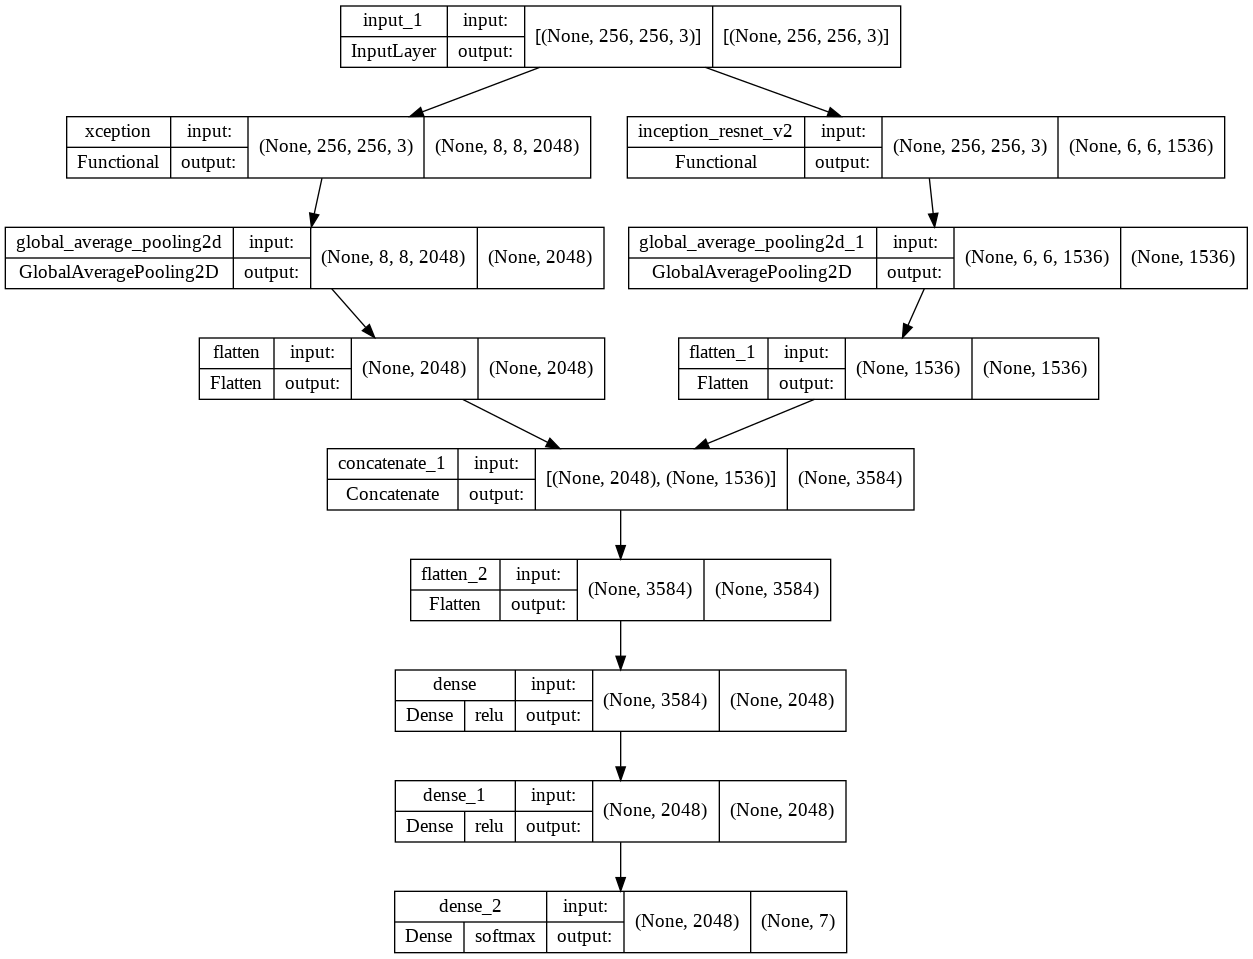

In [ ]:
plot_model(
    model,
    to_file='merged_model.png',
    show_shapes=True,
    show_layer_names=True,
    show_layer_activations=True
)

In [ ]:
callbacks = Earlystopping_Checkpoint('merged.h5', 20)

model_history = model.fit(train_datagen,
                          validation_data=validation_datagen,
                          epochs=100,
                          callbacks=callbacks)

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 6.4064 - accuracy: 0.2165 
Epoch 1: val_loss improved from inf to 1.67070, saving model to /content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/merged.h5
8/8 [==============================] - 217s 26s/step - loss: 6.4064 - accuracy: 0.2165 - val_loss: 1.6707 - val_accuracy: 0.2458
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 1.6886 - accuracy: 0.3443
Epoch 2: val_loss improved from 1.67070 to 1.44898, saving model to /content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/merged.h5
8/8 [==============================] - 51s 7s/step - loss: 1.6886 - accuracy: 0.3443 - val_loss: 1.4490 - val_accuracy: 0.4746
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 1.4581 - accuracy: 0.4825
Epoch 3: val_loss improved from 1.44898 to 1.44812, saving model to /content/drive/MyDrive/Colab Notebooks/Pat

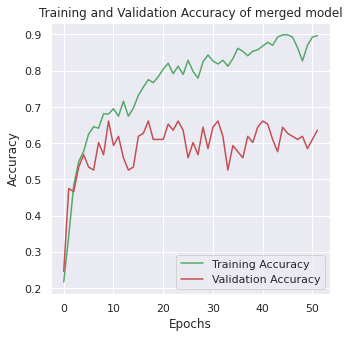

In [ ]:
train_accuracy = model_history.history['accuracy']
validation_accuracy = model_history.history['val_accuracy']
xc = range(callbacks[1].stopped_epoch+1)

showgraph(train_accuracy, validation_accuracy, xc, 'Training Accuracy', "Validation Accuracy", "Training and Validation Accuracy of merged model", "Epochs", "Accuracy")

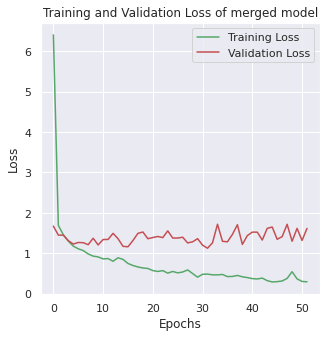

In [ ]:
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
xc = range(callbacks[1].stopped_epoch+1)

showgraph(train_loss, val_loss, xc, "Training Loss", "Validation Loss", "Training and Validation Loss of merged model", "Epochs", "Loss")

#### merging the model xception , inceptionresnetv2 and vgg19

In [ ]:
input_layer=Input(shape=(256,256,3))
input_shape = (256, 256, 3)

x1 = Xception(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
for layer in x1.layers:
  layer.trainable = False

x1 = x1(input_layer)
x1 = GlobalAveragePooling2D()(x1)
x1 = Flatten()(x1)

In [ ]:
x2 = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
for layer in x2.layers:
  layer.trainable = False
x2 = x2(input_layer)
x2 = GlobalAveragePooling2D()(x2)
x2 = Flatten()(x2)

In [ ]:
x3 = VGG19(weights='imagenet', include_top=False, input_shape=(256,256,3))
for layer in x3.layers:
  layer.trainable = False

x3 = x3(input_layer)
x3 = GlobalAveragePooling2D()(x3)
x3 = Flatten()(x3)

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
conc = tf.keras.layers.Concatenate()([x1, x2, x3])
conc = Flatten()(conc)
conc = Dense(2048, activation='relu')(conc)
conc = Dense(2048, activation='relu')(conc)
conc = Dense(7, activation='softmax')(conc)

model = tf.keras.models.Model(inputs=input_layer, outputs=conc)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 xception (Functional)          (None, 8, 8, 2048)   20861480    ['input_4[0][0]']                
                                                                                                  
 inception_resnet_v2 (Functiona  (None, 6, 6, 1536)  54336736    ['input_4[0][0]']                
 l)                                                                                               
                                                                                            

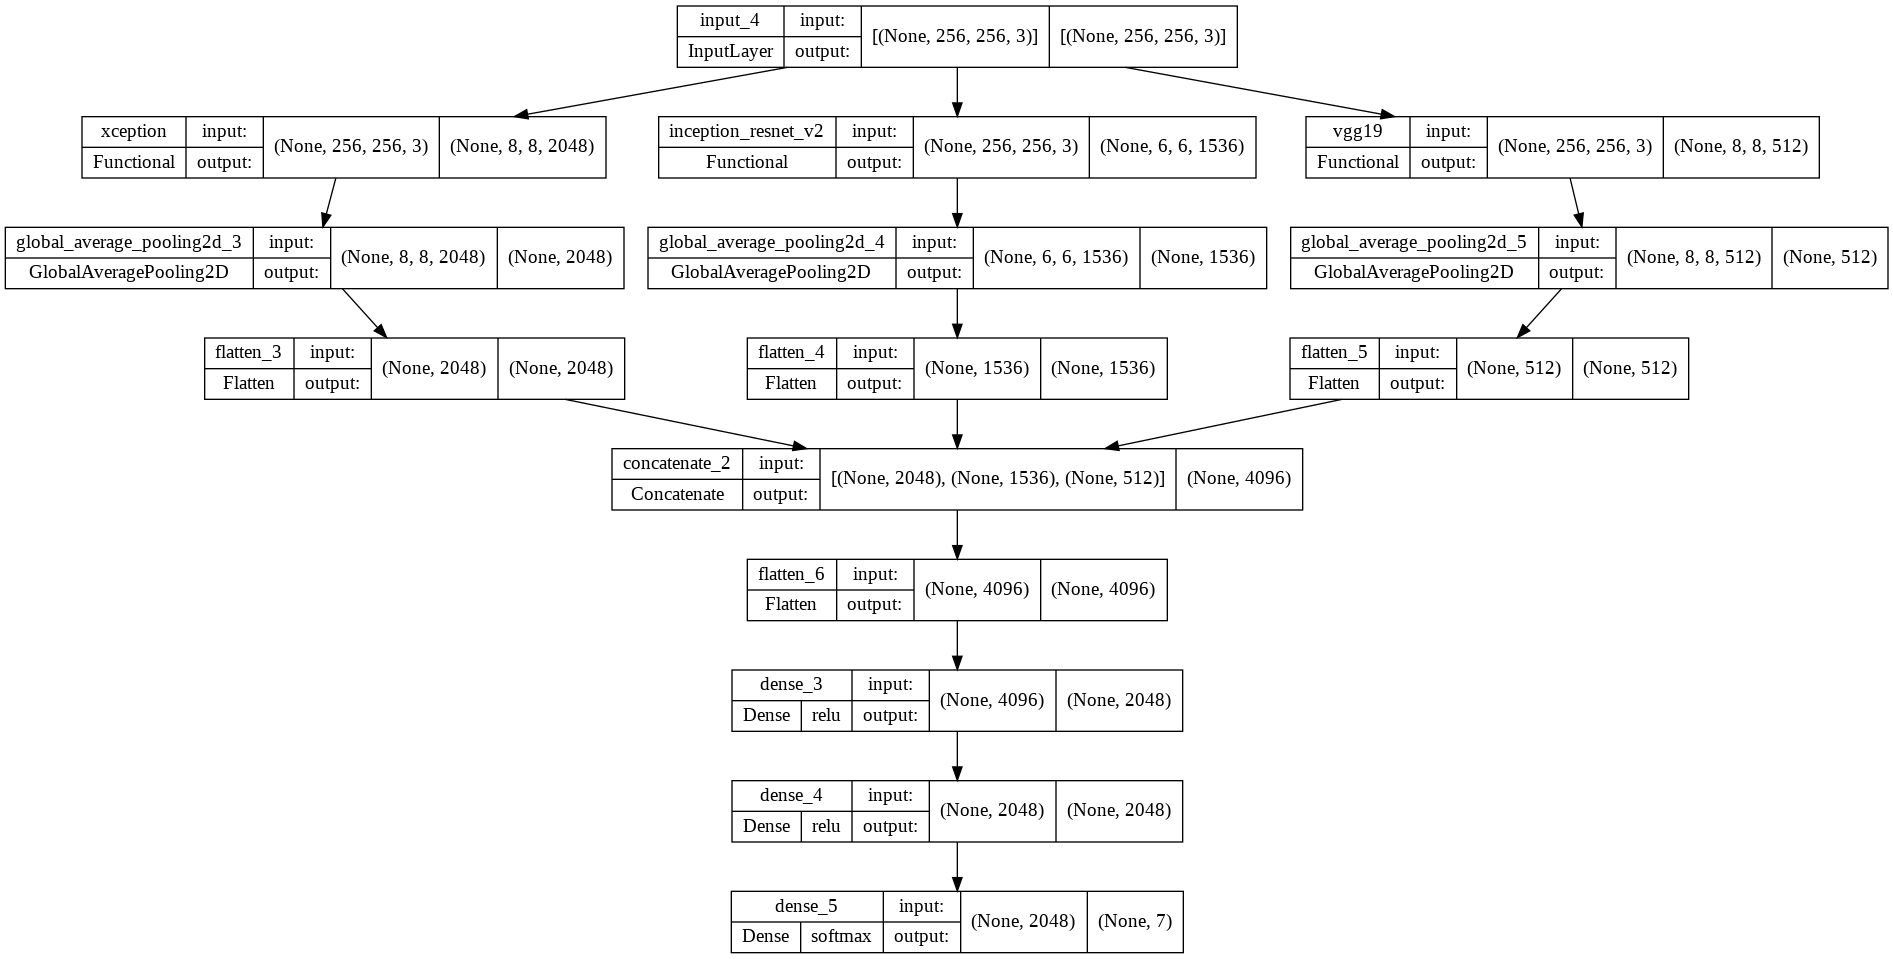

In [ ]:
plot_model(
    model,
    to_file='merged_model2.png',
    show_shapes=True,
    show_layer_names=True,
    show_layer_activations=True
)

In [ ]:
callbacks = Earlystopping_Checkpoint('merged_second.h5', 20)

model_history = model.fit(train_datagen,
                          validation_data=validation_datagen,
                          epochs=100,
                          callbacks=callbacks)

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 7.9951 - accuracy: 0.1175
Epoch 1: val_loss improved from inf to 1.75362, saving model to /content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/merged_second.h5
8/8 [==============================] - 91s 9s/step - loss: 7.9951 - accuracy: 0.1175 - val_loss: 1.7536 - val_accuracy: 0.3644
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 1.7330 - accuracy: 0.3649
Epoch 2: val_loss improved from 1.75362 to 1.58313, saving model to /content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/merged_second.h5
8/8 [==============================] - 51s 7s/step - loss: 1.7330 - accuracy: 0.3649 - val_loss: 1.5831 - val_accuracy: 0.4661
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 1.5295 - accuracy: 0.4722
Epoch 3: val_loss improved from 1.58313 to 1.38178, saving model to /content/drive/MyDrive/Colab No

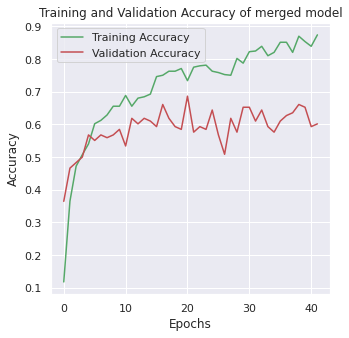

In [ ]:
train_accuracy = model_history.history['accuracy']
validation_accuracy = model_history.history['val_accuracy']
xc = range(callbacks[1].stopped_epoch+1)

showgraph(train_accuracy, validation_accuracy, xc, 'Training Accuracy', "Validation Accuracy", "Training and Validation Accuracy of merged model", "Epochs", "Accuracy")

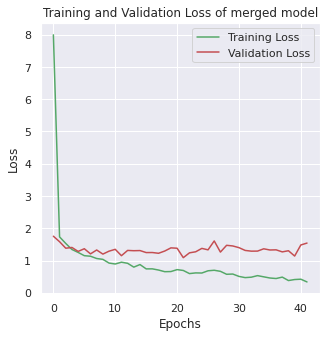

In [ ]:
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
xc = range(callbacks[1].stopped_epoch+1)

showgraph(train_loss, val_loss, xc, "Training Loss", "Validation Loss", "Training and Validation Loss of merged model", "Epochs", "Loss")

#### merging pre trained model xception, inceptionresnetv2, VGG19 and VGG16

In [ ]:
input_layer=Input(shape=(256,256,3))
input_shape = (256, 256, 3)

x1 = Xception(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
for layer in x1.layers:
  layer.trainable = False

x1 = x1(input_layer)
x1 = GlobalAveragePooling2D()(x1)
x1 = Flatten()(x1)

In [ ]:
x2 = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
for layer in x2.layers:
  layer.trainable = False
x2 = x2(input_layer)
x2 = GlobalAveragePooling2D()(x2)
x2 = Flatten()(x2)

In [ ]:
x3 = VGG19(weights='imagenet', include_top=False, input_shape=(256,256,3))
for layer in x3.layers:
  layer.trainable = False

x3 = x3(input_layer)
x3 = GlobalAveragePooling2D()(x3)
x3 = Flatten()(x3)

In [ ]:
x4 = VGG16(weights='imagenet', include_top=False, input_shape=(256,256,3))
for layer in x4.layers:
  layer.trainable = False

x4 = x4(input_layer)
x4 = GlobalAveragePooling2D()(x4)
x4 = Flatten()(x4)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
conc = tf.keras.layers.Concatenate()([x1, x2, x3, x4])
conc = Flatten()(conc)
conc = Dense(2048, activation='relu')(conc)
conc = Dense(2048, activation='relu')(conc)
conc = Dense(7, activation='softmax')(conc)

model = tf.keras.models.Model(inputs=input_layer, outputs=conc)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 xception (Functional)          (None, 8, 8, 2048)   20861480    ['input_8[0][0]']                
                                                                                                  
 inception_resnet_v2 (Functiona  (None, 6, 6, 1536)  54336736    ['input_8[0][0]']                
 l)                                                                                               
                                                                                            

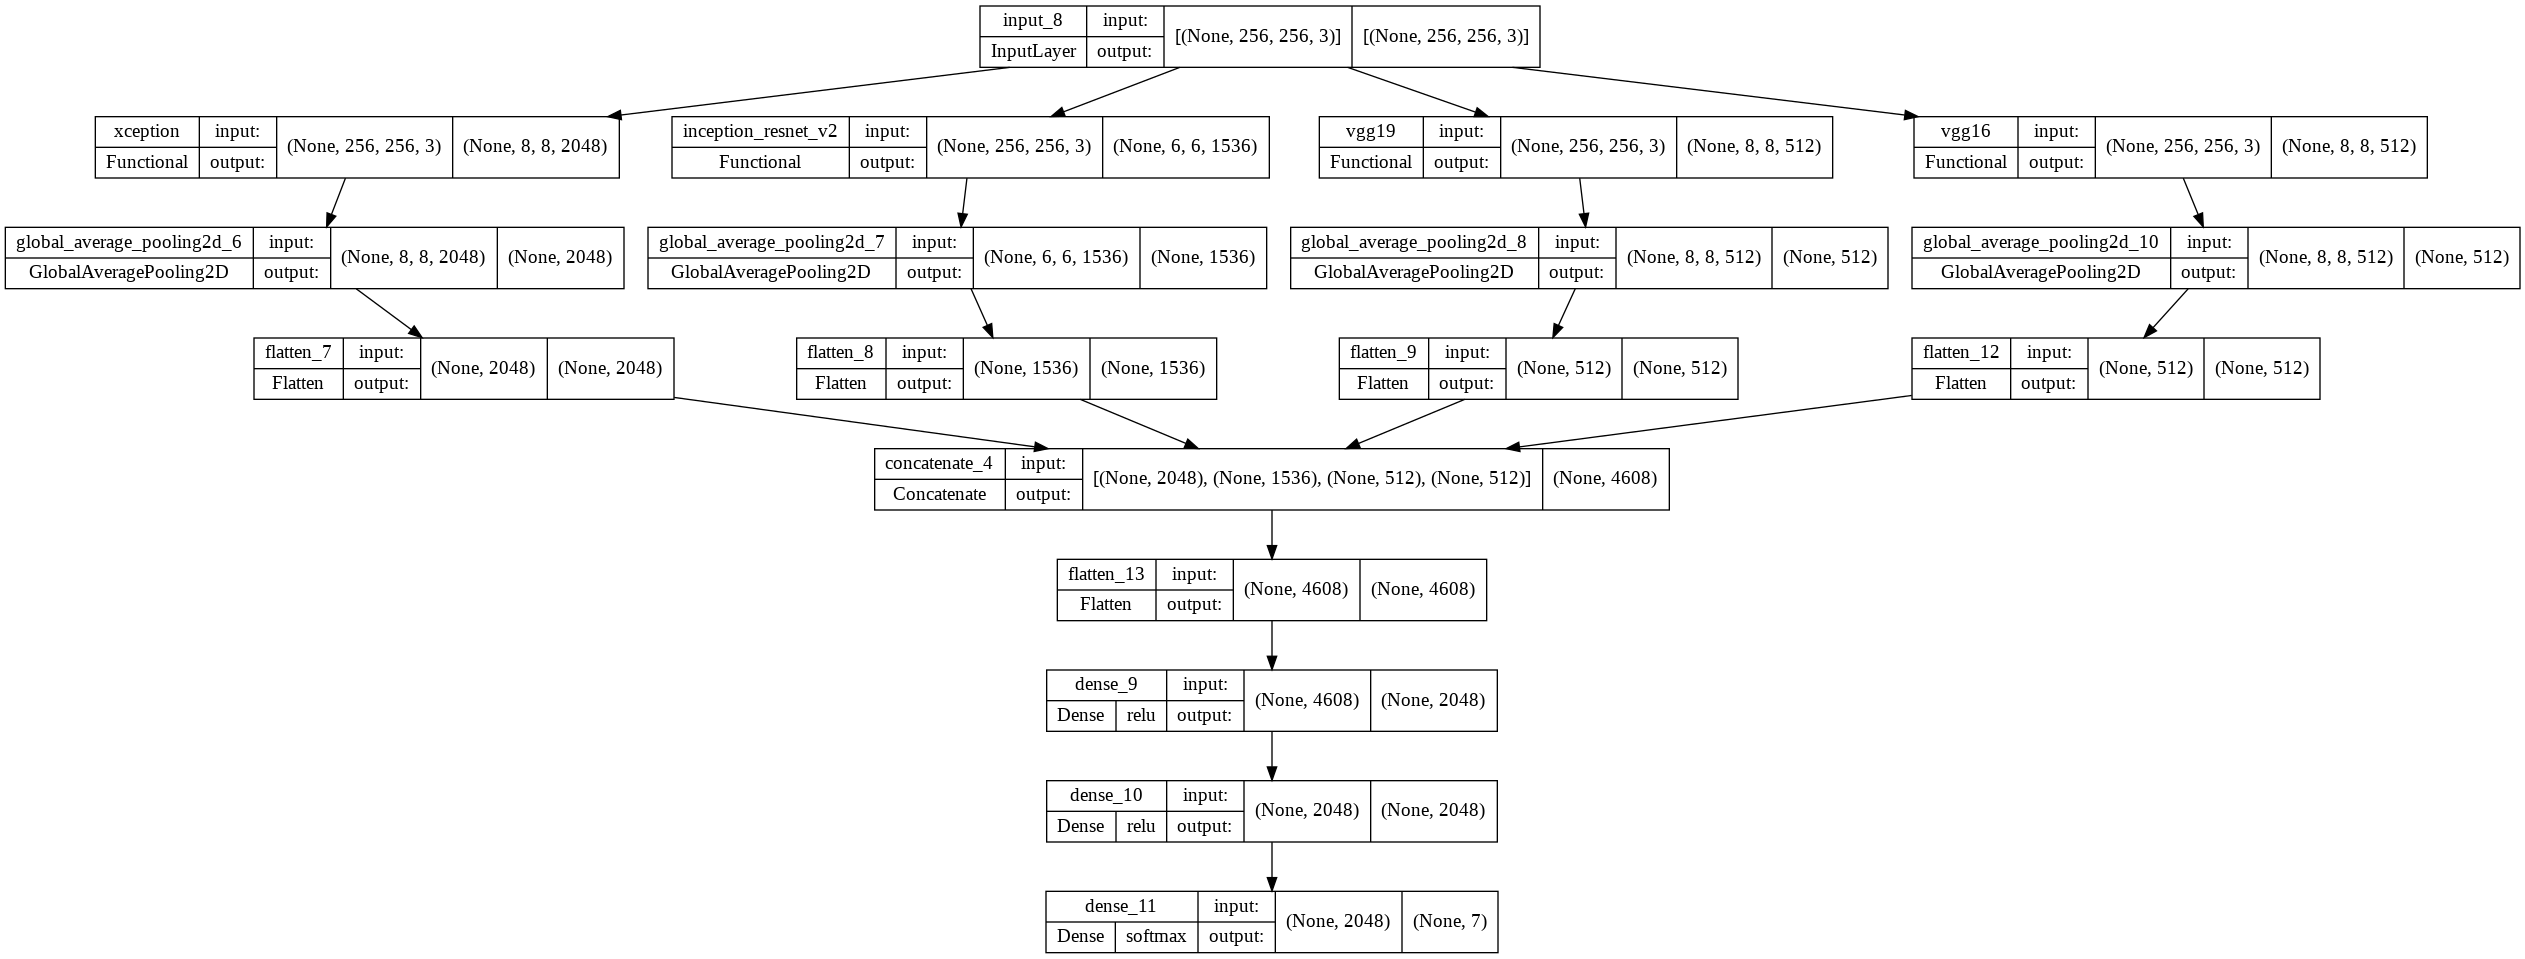

In [ ]:
plot_model(
    model,
    to_file='merged_model3.png',
    show_shapes=True,
    show_layer_names=True,
    show_layer_activations=True
)

In [ ]:
callbacks = Earlystopping_Checkpoint('merged_third.h5', 20)

model_history = model.fit(train_datagen,
                          validation_data=validation_datagen,
                          epochs=100,
                          callbacks=callbacks)

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 6.3473 - accuracy: 0.2206
Epoch 1: val_loss improved from inf to 2.24925, saving model to /content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/merged_third.h5
8/8 [==============================] - 71s 8s/step - loss: 6.3473 - accuracy: 0.2206 - val_loss: 2.2493 - val_accuracy: 0.2373
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 1.8471 - accuracy: 0.2969
Epoch 2: val_loss improved from 2.24925 to 1.52730, saving model to /content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/merged_third.h5
8/8 [==============================] - 53s 7s/step - loss: 1.8471 - accuracy: 0.2969 - val_loss: 1.5273 - val_accuracy: 0.3898
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 1.4958 - accuracy: 0.4515
Epoch 3: val_loss improved from 1.52730 to 1.48016, saving model to /content/drive/MyDrive/Colab Note

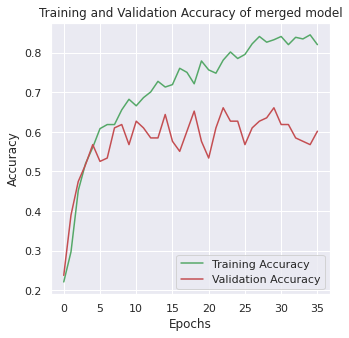

In [ ]:
train_accuracy = model_history.history['accuracy']
validation_accuracy = model_history.history['val_accuracy']
xc = range(callbacks[1].stopped_epoch+1)

showgraph(train_accuracy, validation_accuracy, xc, 'Training Accuracy', "Validation Accuracy", "Training and Validation Accuracy of merged model", "Epochs", "Accuracy")

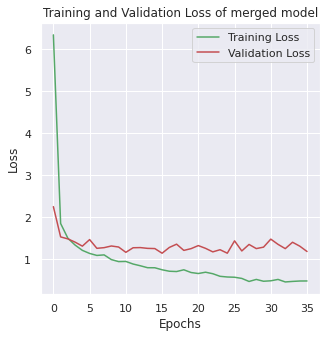

In [ ]:
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
xc = range(callbacks[1].stopped_epoch+1)

showgraph(train_loss, val_loss, xc, "Training Loss", "Validation Loss", "Training and Validation Loss of merged model", "Epochs", "Loss")

# model with xception, inceptionresnetv2 and VGG16

In [ ]:
input_layer=Input(shape=(256,256,3))
input_shape = (256, 256, 3)

x1 = Xception(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
for layer in x1.layers:
  layer.trainable = False

x1 = x1(input_layer)
x1 = GlobalAveragePooling2D()(x1)
x1 = Flatten()(x1)

In [ ]:
x2 = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
for layer in x2.layers:
  layer.trainable = False
x2 = x2(input_layer)
x2 = GlobalAveragePooling2D()(x2)
x2 = Flatten()(x2)

In [ ]:
x3 = VGG16(weights='imagenet', include_top=False, input_shape=(256,256,3))
for layer in x3.layers:
  layer.trainable = False

x3 = x3(input_layer)
x3 = GlobalAveragePooling2D()(x3)
x3 = Flatten()(x3)

In [ ]:
conc = tf.keras.layers.Concatenate()([x1, x2, x3])
conc = Flatten()(conc)
conc = Dense(2048, activation='relu')(conc)
conc = Dense(2048, activation='relu')(conc)
conc = Dense(7, activation='softmax')(conc)

model = tf.keras.models.Model(inputs=input_layer, outputs=conc)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 xception (Functional)          (None, 8, 8, 2048)   20861480    ['input_14[0][0]']               
                                                                                                  
 inception_resnet_v2 (Functiona  (None, 6, 6, 1536)  54336736    ['input_14[0][0]']               
 l)                                                                                               
                                                                                            

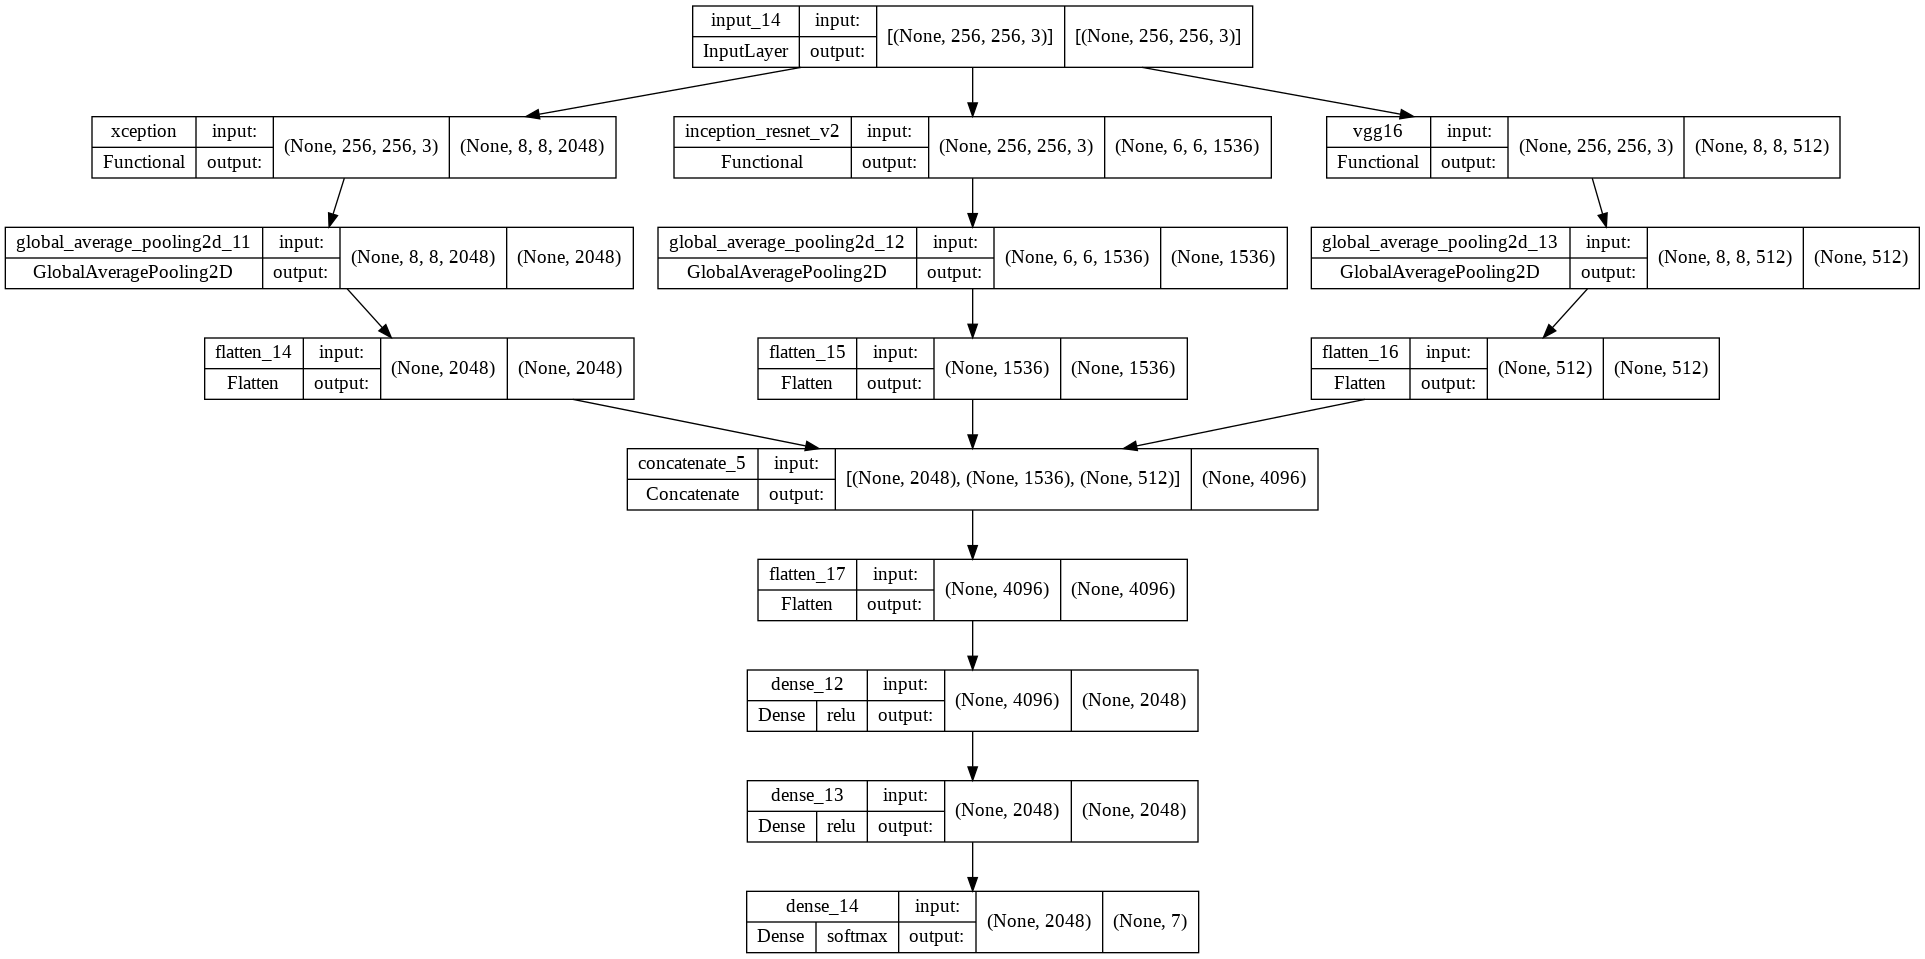

In [ ]:
plot_model(
    model,
    to_file='merged_model3.png',
    show_shapes=True,
    show_layer_names=True,
    show_layer_activations=True
)

In [ ]:
callbacks = Earlystopping_Checkpoint('merged_four.h5', 20)

model_history = model.fit(train_datagen,
                          validation_data=validation_datagen,
                          epochs=100,
                          callbacks=callbacks)

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 5.8680 - accuracy: 0.2021
Epoch 1: val_loss improved from inf to 1.73805, saving model to /content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/merged_four.h5
8/8 [==============================] - 67s 7s/step - loss: 5.8680 - accuracy: 0.2021 - val_loss: 1.7380 - val_accuracy: 0.2458
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 1.7723 - accuracy: 0.2990
Epoch 2: val_loss improved from 1.73805 to 1.61963, saving model to /content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/merged_four.h5
8/8 [==============================] - 54s 7s/step - loss: 1.7723 - accuracy: 0.2990 - val_loss: 1.6196 - val_accuracy: 0.4576
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 1.5216 - accuracy: 0.4433
Epoch 3: val_loss improved from 1.61963 to 1.59983, saving model to /content/drive/MyDrive/Colab Notebo

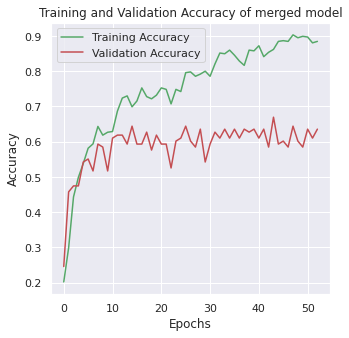

In [ ]:
train_accuracy = model_history.history['accuracy']
validation_accuracy = model_history.history['val_accuracy']
xc = range(callbacks[1].stopped_epoch+1)

showgraph(train_accuracy, validation_accuracy, xc, 'Training Accuracy', "Validation Accuracy", "Training and Validation Accuracy of merged model", "Epochs", "Accuracy")

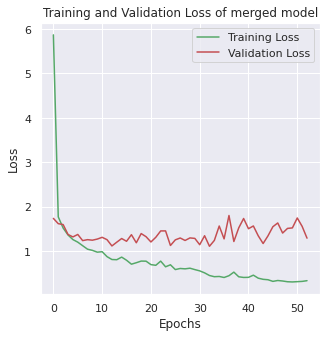

In [ ]:
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
xc = range(callbacks[1].stopped_epoch+1)

showgraph(train_loss, val_loss, xc, "Training Loss", "Validation Loss", "Training and Validation Loss of merged model", "Epochs", "Loss")

# merging pre trained model xception, resnet50 and inceptionresnetv2

In [ ]:
input_layer=Input(shape=(256,256,3))
input_shape = (256, 256, 3)

x1 = Xception(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
for layer in x1.layers:
  layer.trainable = False

x1 = x1(input_layer)
x1 = GlobalAveragePooling2D()(x1)
x1 = Flatten()(x1)

In [ ]:
x2 = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
for layer in x2.layers:
  layer.trainable = False
x2 = x2(input_layer)
x2 = GlobalAveragePooling2D()(x2)
x2 = Flatten()(x2)

In [ ]:
x3 = ResNet50V2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
for layer in x3.layers:
  layer.trainable = False
x3 = x3(input_layer)
x3 = GlobalAveragePooling2D()(x3)
x3 = Flatten()(x3)

In [ ]:
conc = tf.keras.layers.Concatenate()([x1, x2, x3])
conc = Flatten()(conc)
conc = Dense(2048, activation='relu')(conc)
conc = Dropout(0.2)(conc)
conc = Dense(2048, activation='relu')(conc)
conc = Dense(7, activation='softmax')(conc)

model = tf.keras.models.Model(inputs=input_layer, outputs=conc)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_19 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 xception (Functional)          (None, 8, 8, 2048)   20861480    ['input_19[0][0]']               
                                                                                                  
 inception_resnet_v2 (Functiona  (None, 6, 6, 1536)  54336736    ['input_19[0][0]']               
 l)                                                                                               
                                                                                            

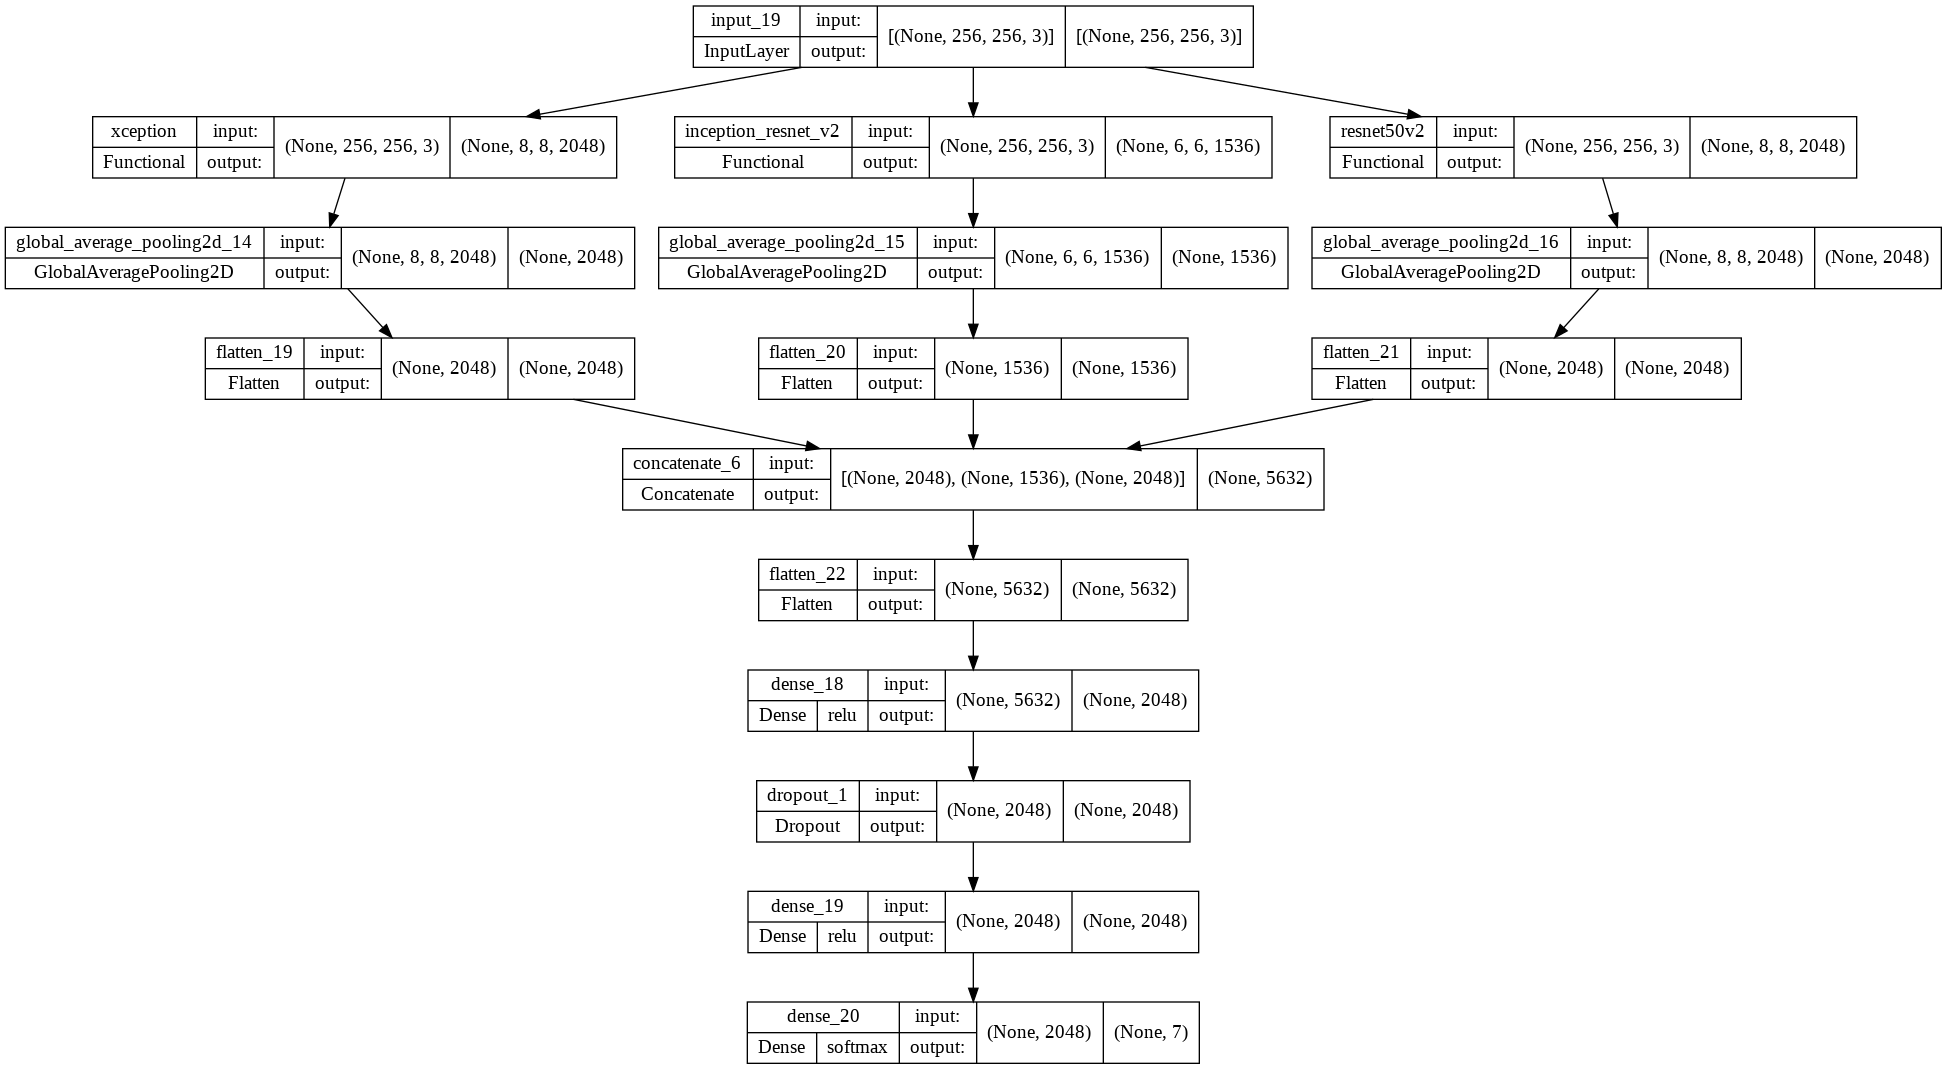

In [ ]:
plot_model(
    model,
    to_file='merged_model4.png',
    show_shapes=True,
    show_layer_names=True,
    show_layer_activations=True
)

In [ ]:
callbacks = Earlystopping_Checkpoint('merged_five.h5', 20)

model_history = model.fit(train_datagen,
                          validation_data=validation_datagen,
                          epochs=100,
                          callbacks=callbacks)

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 8.4814 - accuracy: 0.1897
Epoch 1: val_loss improved from inf to 2.00014, saving model to /content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/merged_five.h5
8/8 [==============================] - 72s 7s/step - loss: 8.4814 - accuracy: 0.1897 - val_loss: 2.0001 - val_accuracy: 0.3729
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 1.7534 - accuracy: 0.3711
Epoch 2: val_loss improved from 2.00014 to 1.48173, saving model to /content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/merged_five.h5
8/8 [==============================] - 52s 7s/step - loss: 1.7534 - accuracy: 0.3711 - val_loss: 1.4817 - val_accuracy: 0.4407
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 1.4927 - accuracy: 0.4701
Epoch 3: val_loss improved from 1.48173 to 1.31591, saving model to /content/drive/MyDrive/Colab Notebo

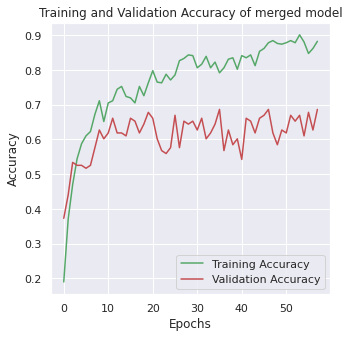

In [ ]:
train_accuracy = model_history.history['accuracy']
validation_accuracy = model_history.history['val_accuracy']
xc = range(callbacks[1].stopped_epoch+1)

showgraph(train_accuracy, validation_accuracy, xc, 'Training Accuracy', "Validation Accuracy", "Training and Validation Accuracy of merged model", "Epochs", "Accuracy")

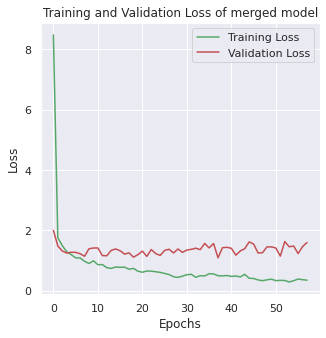

In [ ]:
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
xc = range(callbacks[1].stopped_epoch+1)

showgraph(train_loss, val_loss, xc, "Training Loss", "Validation Loss", "Training and Validation Loss of merged model", "Epochs", "Loss")

# *merging pre trained model xception, resnet50 and inceptionresnetv2 changing dense*

In [ ]:
input_layer=Input(shape=(256,256,3))
input_shape = (256, 256, 3)

x1 = Xception(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
for layer in x1.layers:
  layer.trainable = False

x1 = x1(input_layer)
x1 = GlobalAveragePooling2D()(x1)
x1 = Flatten()(x1)

In [ ]:
x2 = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
for layer in x2.layers:
  layer.trainable = False
x2 = x2(input_layer)
x2 = GlobalAveragePooling2D()(x2)
x2 = Flatten()(x2)

In [ ]:
x3 = ResNet50V2(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
for layer in x3.layers:
  layer.trainable = False
x3 = x3(input_layer)
x3 = GlobalAveragePooling2D()(x3)
x3 = Flatten()(x3)

In [ ]:
conc = tf.keras.layers.Concatenate()([x1, x2, x3])
conc = Flatten()(conc)
conc = Dense(1024, activation='relu')(conc)
conc = Dropout(0.2)(conc)
conc = Dense(1024, activation='relu')(conc)
conc = Dense(7, activation='softmax')(conc)

model = tf.keras.models.Model(inputs=input_layer, outputs=conc)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_23 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 xception (Functional)          (None, 8, 8, 2048)   20861480    ['input_23[0][0]']               
                                                                                                  
 inception_resnet_v2 (Functiona  (None, 6, 6, 1536)  54336736    ['input_23[0][0]']               
 l)                                                                                               
                                                                                            

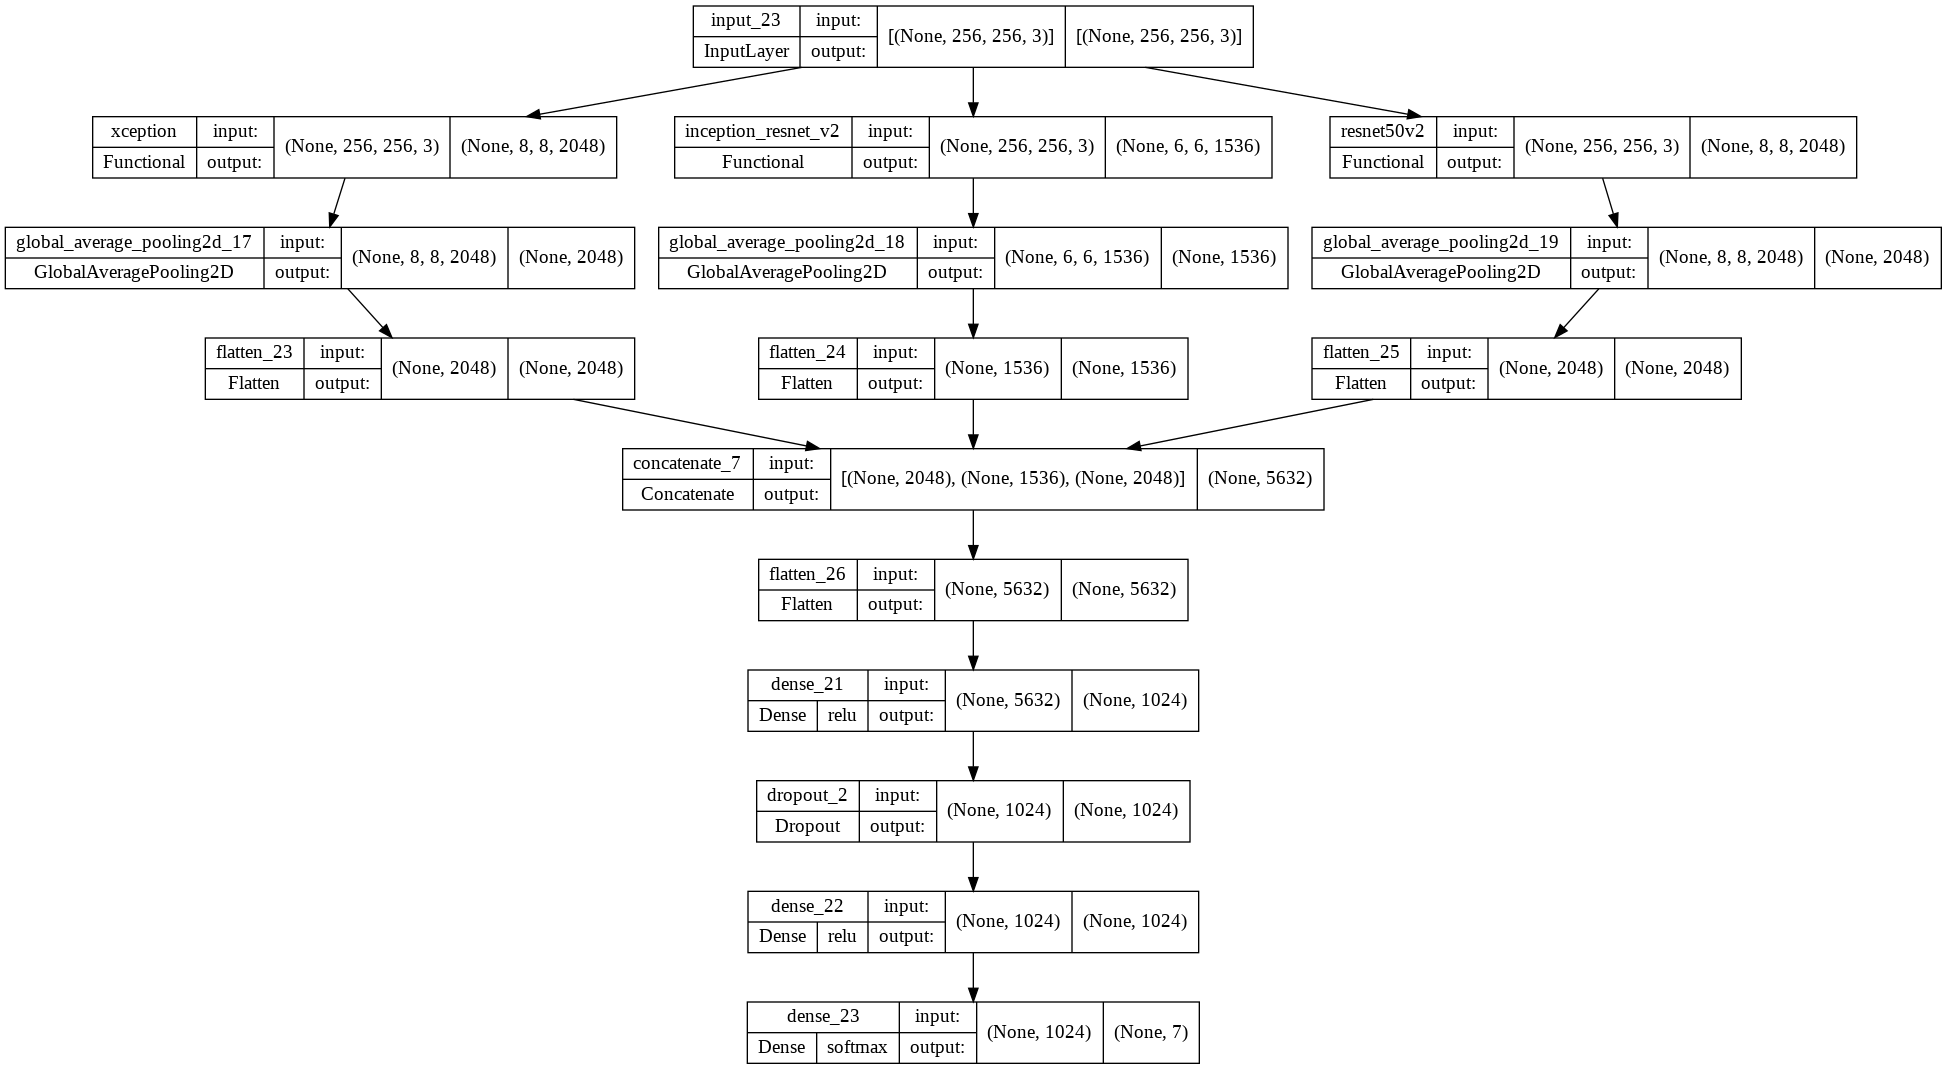

In [ ]:
plot_model(
    model,
    to_file='merged_model4.png',
    show_shapes=True,
    show_layer_names=True,
    show_layer_activations=True
)

In [ ]:
callbacks = Earlystopping_Checkpoint('merged_six.h5', 20)

model_history = model.fit(train_datagen,
                          validation_data=validation_datagen,
                          epochs=100,
                          callbacks=callbacks)

Epoch 1/100
16/16 [==============================] - ETA: 0s - loss: 3.6081 - accuracy: 0.2454
Epoch 1: val_loss improved from inf to 1.55359, saving model to /content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/merged_six.h5
16/16 [==============================] - 69s 3s/step - loss: 3.6081 - accuracy: 0.2454 - val_loss: 1.5536 - val_accuracy: 0.4153
Epoch 2/100
16/16 [==============================] - ETA: 0s - loss: 1.4321 - accuracy: 0.4887
Epoch 2: val_loss improved from 1.55359 to 1.39136, saving model to /content/drive/MyDrive/Colab Notebooks/Pattern Lab/Diabetics-Ratinopathy-detection-from-fundus-image/merged_six.h5
16/16 [==============================] - 50s 3s/step - loss: 1.4321 - accuracy: 0.4887 - val_loss: 1.3914 - val_accuracy: 0.4492
Epoch 3/100
16/16 [==============================] - ETA: 0s - loss: 1.3092 - accuracy: 0.5381
Epoch 3: val_loss did not improve from 1.39136
16/16 [==============================] - 44s 3s/

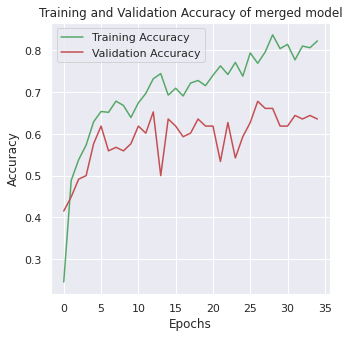

In [ ]:
train_accuracy = model_history.history['accuracy']
validation_accuracy = model_history.history['val_accuracy']
xc = range(callbacks[1].stopped_epoch+1)

showgraph(train_accuracy, validation_accuracy, xc, 'Training Accuracy', "Validation Accuracy", "Training and Validation Accuracy of merged model", "Epochs", "Accuracy")

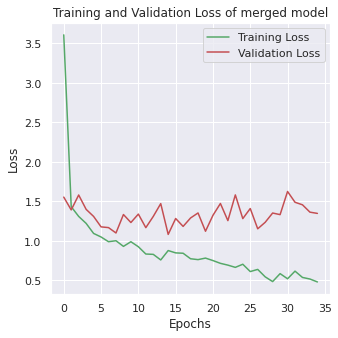

In [ ]:
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
xc = range(callbacks[1].stopped_epoch+1)

showgraph(train_loss, val_loss, xc, "Training Loss", "Validation Loss", "Training and Validation Loss of merged model", "Epochs", "Loss")



`1.   Scratch model`
----
`2.   Xception, InceptionResnetv2, VGG16, VGG19, Resnet50 ( transfer learning )`
----
```
3.   Xception, InceptionResnetv2
4.   Xception, InceptionResnetv2, VGG19
5.   Xception, InceptionResnetv2, Resnet50
6.   Xception, InceptionResnetv2, VGG16
```






